In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
        

# DATA CLEANING & EDA

In [196]:
orders=pd.read_csv('orders.csv')
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,02-10-2017 10:56,02-10-2017 11:07,10-10-2017 21:25,18-10-2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,24-07-2018 20:41,26-07-2018 03:24,07-08-2018 15:27,13-08-2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,08-08-2018 08:38,08-08-2018 08:55,17-08-2018 18:06,04-09-2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,18-11-2017 19:28,18-11-2017 19:45,02-12-2017 00:28,15-12-2017 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,13-02-2018 21:18,13-02-2018 22:20,16-02-2018 18:17,26-02-2018 00:00
5,a4591c265e18cb1dcee52889e2d8acc3,80bb27c7c16e8f973207a5086ab329e2,delivered,09-07-2017 21:57,09-07-2017 22:10,26-07-2017 10:57,01-08-2017 00:00
6,136cce7faa42fdb2cefd53fdc79a6098,36edbb3fb164b1f16485364b6fb04c73,invoiced,11-04-2017 12:22,13-04-2017 13:25,NaN,09-05-2017 00:00
7,6514b8ad8028c9f2cc2374ded245783f,932afa1e708222e5821dac9cd5db4cae,delivered,16-05-2017 13:10,16-05-2017 13:22,26-05-2017 12:55,07-06-2017 00:00
8,76c6e866289321a7c93b82b54852dc33,39382392765b6dc74812866ee5ee92a7,delivered,23-01-2017 18:29,25-01-2017 02:50,02-02-2017 14:08,06-03-2017 00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,299905e3934e9e181bfb2e164dd4b4f8,delivered,29-07-2017 11:55,29-07-2017 12:05,16-08-2017 17:14,23-08-2017 00:00


In [197]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_timestamp        96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(7)
memory usage: 5.3+ MB


In [198]:
orders.size

696087

In [199]:
orders.shape

(99441, 7)

In [200]:
orders.describe

<bound method NDFrame.describe of                                order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1      53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
2      47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
3      949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4      ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  6359f309b166b0196dbf7ad2ac62bb5a   
99437  63943bddc261676b46f01ca7ac2f7bd8  da62f9e57a76d978d02ab5362c509660   
99438  83c1379a015df1e13d02aae0204711ab  737520a9aad80b3fbbdad19b66b37b30   
99439  11c177c8e97725db2631073c19f07b62  5097a5312c8b157bb7be58ae360ef43c   
99440  66dea50a8b16d9b4dee7af250b4be1a5  60350aa974b26ff12caad89e55993bd6   

      order_status order_purchase_timesta

In [201]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [202]:
products=pd.read_csv('products.csv')
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [203]:
products.shape

(32951, 6)

In [204]:
products.size

197706

In [205]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
product_id               32951 non-null object
product_category_name    32781 non-null object
product_weight_g         32949 non-null float64
product_length_cm        32949 non-null float64
product_height_cm        32949 non-null float64
product_width_cm         32949 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [206]:
payments=pd.read_csv('payments.csv')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [207]:
payments.shape

(103886, 5)

In [208]:
payments.size

519430

In [209]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [210]:
customers=pd.read_csv('customers.csv')
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [211]:
customers.shape

(99441, 4)

In [212]:
customers.size

397764

In [213]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
customer_id                 99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [214]:
order_items=pd.read_csv('order_items.csv')
order_items.shape

(112650, 6)

In [215]:
order_items.size

675900

In [216]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
order_id            112650 non-null object
order_item_id       112650 non-null int64
product_id          112650 non-null object
seller_id           112650 non-null object
price               112650 non-null float64
shipping_charges    112650 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [217]:
order_payments=payments.merge(orders,on='order_id',how='outer')
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,708ab75d2a007f0564aedd11139c7708,delivered,25-04-2018 22:01,25-04-2018 22:15,09-05-2018 17:36,22-05-2018 00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,a8b9d3a27068454b1c98cc67d4e31e6f,delivered,26-06-2018 11:01,26-06-2018 11:18,29-06-2018 20:32,16-07-2018 00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,6f70c0b2f7552832ba46eb57b1c5651e,delivered,12-12-2017 11:19,14-12-2017 09:52,18-12-2017 17:24,04-01-2018 00:00
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,87695ed086ebd36f20404c82d20fca87,delivered,06-12-2017 12:04,06-12-2017 12:13,21-12-2017 01:35,04-01-2018 00:00
4,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2.0,128.45,4291db0da71914754618cd789aebcd56,delivered,21-05-2018 13:59,21-05-2018 16:14,01-06-2018 21:44,13-06-2018 00:00
...,...,...,...,...,...,...,...,...,...,...,...
103882,7b905861d7c825891d6347454ea7863f,1.0,credit_card,2.0,96.80,53b30ca78efb2b7efcd3f9e461587eb2,delivered,18-08-2017 09:45,18-08-2017 10:04,23-08-2017 22:25,12-09-2017 00:00
103883,32609bbb3dd69b3c066a6860554a77bf,1.0,credit_card,1.0,47.77,d3c7da954a324253814096bcaf240e4e,invoiced,18-11-2017 17:27,18-11-2017 17:46,NaN,05-12-2017 00:00
103884,b8b61059626efa996a60be9bb9320e10,1.0,credit_card,5.0,369.54,b84dc68f02f122a88d7e7bbd37b06204,delivered,07-08-2018 23:26,07-08-2018 23:45,21-08-2018 22:41,24-08-2018 00:00
103885,28bbae6599b09d39ca406b747b6632b1,1.0,wallet,1.0,191.58,b1f51a4e19da3338e51fbcfabefad1bf,delivered,05-12-2017 08:18,06-12-2017 02:50,05-02-2018 14:59,29-12-2017 00:00


In [218]:
order_payments_items=order_items.merge(order_payments,on='order_id',how='outer')
order_payments_items

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,delivered,13-09-2017 08:59,13-09-2017 09:45,20-09-2017 23:43,29-09-2017 00:00
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,delivered,26-04-2017 10:53,26-04-2017 11:05,12-05-2017 16:04,15-05-2017 00:00
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,delivered,14-01-2018 14:33,14-01-2018 14:48,22-01-2018 13:19,05-02-2018 00:00
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,delivered,08-08-2018 10:00,08-08-2018 10:10,14-08-2018 13:32,20-08-2018 00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,delivered,04-02-2017 13:57,04-02-2017 14:10,01-03-2017 16:42,17-03-2017 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,fc20b8e282da6f3fbcdd3a3cedecb723,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,10.0,3782.19,5aad27a7b4f74b1c3389d56c74db1057,unavailable,01-03-2017 10:02,02-03-2017 08:10,NaN,20-03-2017 00:00
118430,92fca7ed7b7df4695007bd7f227e3333,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,52.57,858340521d8ba271fb5a0a03816952c2,unavailable,01-02-2017 12:03,01-02-2017 12:15,NaN,03-03-2017 00:00
118431,b17fd4c033b06e8d888de8ea6105ef9d,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,5.0,103.10,802ce2dcb7d0d4a534945e27d53a9636,canceled,20-03-2017 19:38,20-03-2017 19:38,NaN,12-04-2017 00:00
118432,974f9f87a3bad01b2ac72fe987505e9b,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,3.0,91.18,e075305a11bf4cc09e8395bd97266a1e,unavailable,09-06-2017 20:25,09-06-2017 20:35,NaN,01-08-2017 00:00


In [219]:
order_payments_items_products=products.merge(order_payments_items,on='product_id',how='outer')
order_payments_items_products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,price,...,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,...,1.0,debit_card,1.0,18.30,b1a1199364a4a7fe27c4486ab63f550d,delivered,24-04-2018 16:16,24-04-2018 19:04,27-04-2018 16:42,09-05-2018 00:00
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,248.00,...,1.0,voucher,1.0,265.99,4b86049cb99e4aa774031daa9cd18f18,delivered,31-01-2018 18:55,31-01-2018 19:11,16-02-2018 13:27,22-02-2018 00:00
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,79.80,...,1.0,credit_card,1.0,87.62,f63805d9c7edb84d92413af34b86a39c,delivered,09-07-2018 21:18,09-07-2018 21:30,11-07-2018 23:24,18-07-2018 00:00
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,112.30,...,1.0,credit_card,2.0,121.84,619e926d09b26efbd5180368b1ddc874,delivered,03-08-2018 08:55,03-08-2018 09:31,06-08-2018 15:14,08-08-2018 00:00
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,37.90,...,1.0,credit_card,4.0,46.19,ad353b4fb0e294adc4eda48af73e68a6,delivered,11-04-2018 01:06,11-04-2018 01:30,13-04-2018 22:41,26-04-2018 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,NaN,NaN,NaN,NaN,NaN,NaN,fc20b8e282da6f3fbcdd3a3cedecb723,NaN,NaN,NaN,...,1.0,credit_card,10.0,3782.19,5aad27a7b4f74b1c3389d56c74db1057,unavailable,01-03-2017 10:02,02-03-2017 08:10,NaN,20-03-2017 00:00
118430,NaN,NaN,NaN,NaN,NaN,NaN,92fca7ed7b7df4695007bd7f227e3333,NaN,NaN,NaN,...,1.0,credit_card,1.0,52.57,858340521d8ba271fb5a0a03816952c2,unavailable,01-02-2017 12:03,01-02-2017 12:15,NaN,03-03-2017 00:00
118431,NaN,NaN,NaN,NaN,NaN,NaN,b17fd4c033b06e8d888de8ea6105ef9d,NaN,NaN,NaN,...,1.0,credit_card,5.0,103.10,802ce2dcb7d0d4a534945e27d53a9636,canceled,20-03-2017 19:38,20-03-2017 19:38,NaN,12-04-2017 00:00
118432,NaN,NaN,NaN,NaN,NaN,NaN,974f9f87a3bad01b2ac72fe987505e9b,NaN,NaN,NaN,...,1.0,credit_card,3.0,91.18,e075305a11bf4cc09e8395bd97266a1e,unavailable,09-06-2017 20:25,09-06-2017 20:35,NaN,01-08-2017 00:00


In [220]:
retail_dataset=customers.merge(order_payments_items_products,on='customer_id',how='outer')
retail_dataset

,customer_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,toys,8683.0,54.0,64.0,31.0,...,21.88,1.0,credit_card,2.0,146.87,delivered,16-05-2017 15:05,16-05-2017 15:22,25-05-2017 10:35,05-06-2017 00:00
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,housewares,10150.0,89.0,15.0,40.0,...,46.48,1.0,credit_card,8.0,335.48,delivered,12-01-2018 20:48,12-01-2018 20:58,29-01-2018 12:41,06-02-2018 00:00
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,bd07b66896d6f1494f5b86251848ced7,toys,8267.0,52.0,52.0,17.0,...,17.79,1.0,credit_card,7.0,157.73,delivered,19-05-2018 16:07,20-05-2018 16:19,14-06-2018 17:58,13-06-2018 00:00
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,a5647c44af977b148e0a3a4751a09e2e,office_furniture,12160.0,56.0,51.0,28.0,...,23.36,1.0,credit_card,1.0,173.30,delivered,13-03-2018 16:06,13-03-2018 17:29,28-03-2018 16:04,10-04-2018 00:00
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,9391a573abe00141c56e38d84d7d5b3b,toys,5200.0,45.0,15.0,35.0,...,22.25,1.0,credit_card,8.0,252.25,delivered,29-07-2018 09:51,29-07-2018 10:10,09-08-2018 20:55,15-08-2018 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128580,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,ccb4503d9d43d245d3b295d0544f988b,toys,611.0,22.0,22.0,23.0,...,13.88,1.0,credit_card,6.0,88.78,delivered,07-04-2018 15:48,07-04-2018 16:08,13-04-2018 20:06,25-04-2018 00:00
128581,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ede6b0570a75a4b9de4f383329f99ee,toys,1211.0,25.0,24.0,22.0,...,14.16,1.0,credit_card,3.0,129.06,delivered,04-04-2018 08:20,04-04-2018 08:35,11-04-2018 18:54,20-04-2018 00:00
128582,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,7a5d2e1e131a860ae7d18f6fffa9d689,toys,870.0,25.0,20.0,18.0,...,19.04,1.0,credit_card,5.0,56.04,delivered,08-04-2018 20:11,08-04-2018 20:30,09-05-2018 19:03,02-05-2018 00:00
128583,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,f819f0c84a64f02d3a5606ca95edd272,toys,710.0,19.0,13.0,14.0,...,22.07,1.0,credit_card,2.0,711.07,delivered,03-11-2017 21:08,03-11-2017 21:31,16-11-2017 19:58,05-12-2017 00:00


In [221]:
retail_dataset.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,toys,8683.0,54.0,64.0,31.0,...,21.88,1.0,credit_card,2.0,146.87,delivered,16-05-2017 15:05,16-05-2017 15:22,25-05-2017 10:35,05-06-2017 00:00
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,housewares,10150.0,89.0,15.0,40.0,...,46.48,1.0,credit_card,8.0,335.48,delivered,12-01-2018 20:48,12-01-2018 20:58,29-01-2018 12:41,06-02-2018 00:00
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,bd07b66896d6f1494f5b86251848ced7,toys,8267.0,52.0,52.0,17.0,...,17.79,1.0,credit_card,7.0,157.73,delivered,19-05-2018 16:07,20-05-2018 16:19,14-06-2018 17:58,13-06-2018 00:00
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,a5647c44af977b148e0a3a4751a09e2e,office_furniture,12160.0,56.0,51.0,28.0,...,23.36,1.0,credit_card,1.0,173.30,delivered,13-03-2018 16:06,13-03-2018 17:29,28-03-2018 16:04,10-04-2018 00:00
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,9391a573abe00141c56e38d84d7d5b3b,toys,5200.0,45.0,15.0,35.0,...,22.25,1.0,credit_card,8.0,252.25,delivered,29-07-2018 09:51,29-07-2018 10:10,09-08-2018 20:55,15-08-2018 00:00


In [222]:
retail_dataset.shape

(128585, 24)

In [223]:
retail_dataset.size

3086040

In [224]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128585 entries, 0 to 128584
Data columns (total 24 columns):
customer_id                      128585 non-null object
customer_zip_code_prefix         128585 non-null int64
customer_city                    128585 non-null object
customer_state                   128585 non-null object
product_id                       127598 non-null object
product_category_name            127122 non-null object
product_weight_g                 127573 non-null float64
product_length_cm                127573 non-null float64
product_height_cm                127573 non-null float64
product_width_cm                 127573 non-null float64
order_id                         128585 non-null object
order_item_id                    127598 non-null float64
seller_id                        127598 non-null object
price                            127598 non-null float64
shipping_charges                 127598 non-null float64
payment_sequential               128582 non

In [225]:
retail_dataset.isnull().sum()

customer_id                         0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_id                        987
product_category_name            1463
product_weight_g                 1012
product_length_cm                1012
product_height_cm                1012
product_width_cm                 1012
order_id                            0
order_item_id                     987
seller_id                         987
price                             987
shipping_charges                  987
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
order_status                        0
order_purchase_timestamp            0
order_approved_at                 267
order_delivered_timestamp        3752
order_estimated_delivery_date       0
dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

In [226]:
cust=customers['customer_id'].nunique()
cust

96096

Number of Unique Customers is 96096

In [227]:
cities=customers['customer_city'].nunique()
cities

4119

In [228]:
c1=customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
c1.head(10)

customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
Name: customer_id, dtype: int64

These are top 10 unique cities in Database

# CUSTOMERS BY CITY

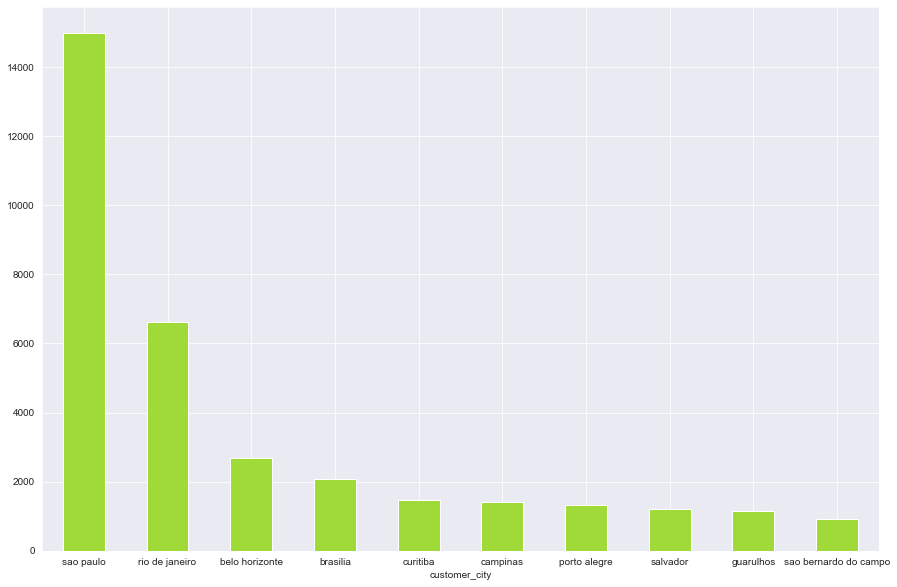

In [229]:
c2=c1.head(10)
plt.figure(figsize=(15,10))
c2.plot(kind='bar',rot=0)

In [230]:
zips=customers.groupby('customer_zip_code_prefix')['customer_id'].nunique().sort_values(ascending=False)
zips

customer_zip_code_prefix
22790    136
22793    119
24220    114
24230    113
22775    107
        ... 
44035      1
44057      1
44061      1
44066      1
1003       1
Name: customer_id, Length: 14994, dtype: int64

# ANALYSIS OF ORDER DATABASE

In [231]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,02-10-2017 10:56,02-10-2017 11:07,10-10-2017 21:25,18-10-2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,24-07-2018 20:41,26-07-2018 03:24,07-08-2018 15:27,13-08-2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,08-08-2018 08:38,08-08-2018 08:55,17-08-2018 18:06,04-09-2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,18-11-2017 19:28,18-11-2017 19:45,02-12-2017 00:28,15-12-2017 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,13-02-2018 21:18,13-02-2018 22:20,16-02-2018 18:17,26-02-2018 00:00


In [232]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_timestamp        96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(7)
memory usage: 5.3+ MB


In [233]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_timestamp        object
order_estimated_delivery_date    object
dtype: object

In [234]:

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%d-%m-%Y %H:%M')
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"], format='%d-%m-%Y %H:%M')
orders["order_delivered_timestamp"] = pd.to_datetime(orders["order_delivered_timestamp"], format='%d-%m-%Y %H:%M')
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], format='%d-%m-%Y %H:%M')
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_timestamp        datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

<Figure size 1152x720 with 0 Axes>

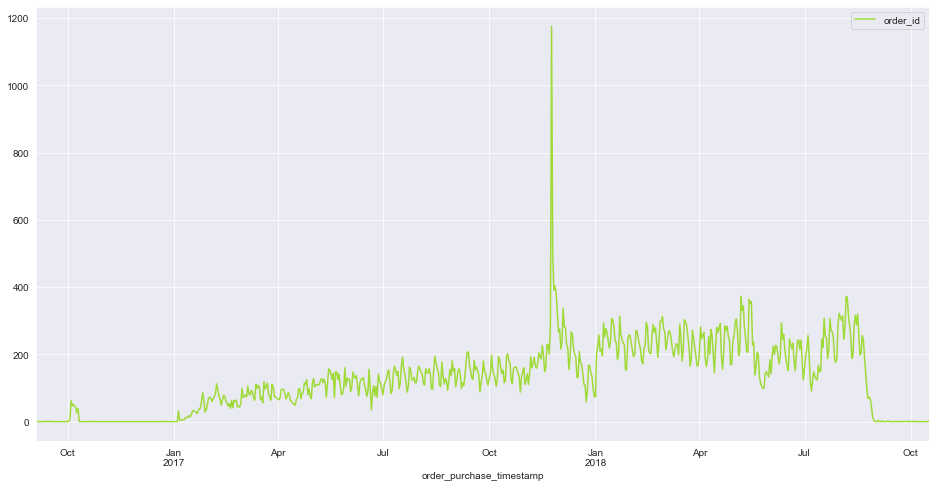

In [235]:
counts=orders.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='D')).count()
fig=plt.figure(figsize=(16,10))
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
counts.plot(y = "order_id", use_index=True, ax=ax)

# From the graph above we can see that there is a peak in the region of Christmas.

PAYMENTS

In [236]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# DISTRIBUTION OF PAYMENT MODE

Text(0.5, 1.0, 'Distribution of modes of payment')

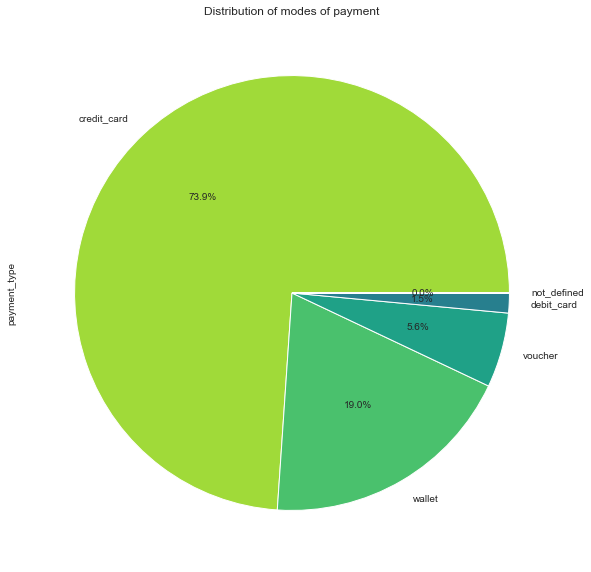

In [237]:
plt.figure(figsize=(10,10))
payments['payment_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of modes of payment')

74% of payment is through credit card and 19% is through Wallets

In [238]:
payments.groupby('payment_type').payment_installments.max()

payment_type
credit_card    24
debit_card      1
not_defined     1
voucher         1
wallet          1
Name: payment_installments, dtype: int64

In [239]:
pay_cr=retail_dataset[retail_dataset['payment_type']=='credit_card']
pay_cr.head()


,customer_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,toys,8683.0,54.0,64.0,31.0,...,21.88,1.0,credit_card,2.0,146.87,delivered,16-05-2017 15:05,16-05-2017 15:22,25-05-2017 10:35,05-06-2017 00:00
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,housewares,10150.0,89.0,15.0,40.0,...,46.48,1.0,credit_card,8.0,335.48,delivered,12-01-2018 20:48,12-01-2018 20:58,29-01-2018 12:41,06-02-2018 00:00
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,bd07b66896d6f1494f5b86251848ced7,toys,8267.0,52.0,52.0,17.0,...,17.79,1.0,credit_card,7.0,157.73,delivered,19-05-2018 16:07,20-05-2018 16:19,14-06-2018 17:58,13-06-2018 00:00
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,a5647c44af977b148e0a3a4751a09e2e,office_furniture,12160.0,56.0,51.0,28.0,...,23.36,1.0,credit_card,1.0,173.30,delivered,13-03-2018 16:06,13-03-2018 17:29,28-03-2018 16:04,10-04-2018 00:00
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,9391a573abe00141c56e38d84d7d5b3b,toys,5200.0,45.0,15.0,35.0,...,22.25,1.0,credit_card,8.0,252.25,delivered,29-07-2018 09:51,29-07-2018 10:10,09-08-2018 20:55,15-08-2018 00:00


# STATEWISE AVERAGE NUMBER OF  INSTALLMENT FOR TRANSACTION THROUGH CREDIT CARD

Text(0, 0.5, 'Avg No. of installments')

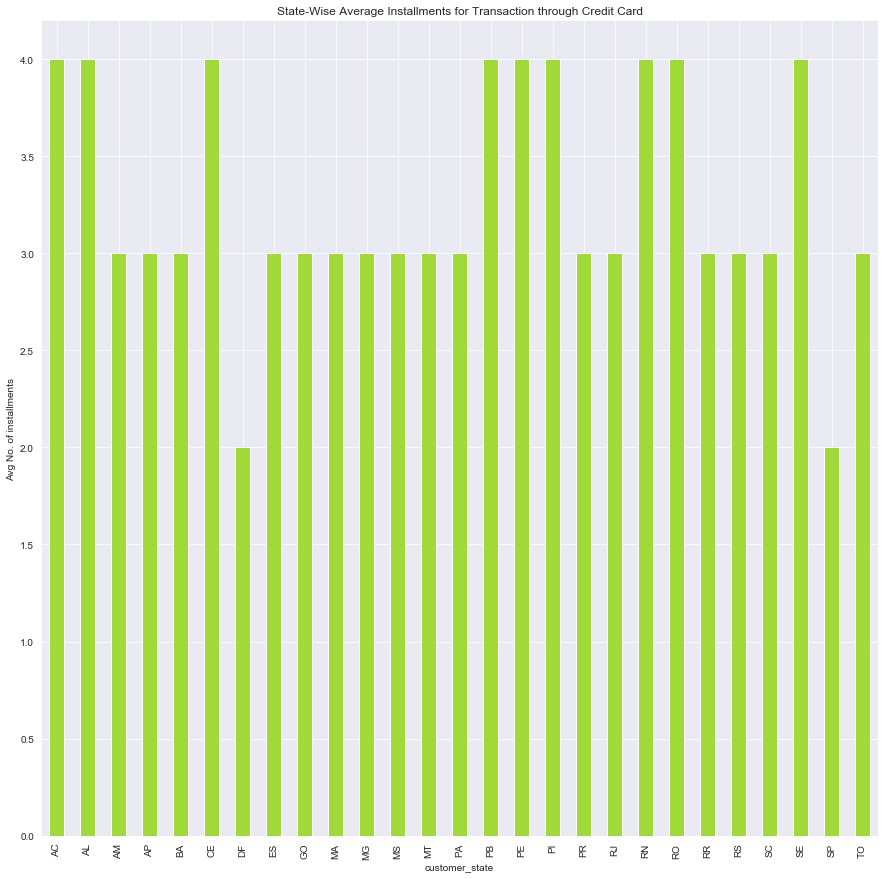

In [240]:
plt.figure(figsize=(15,15))
pay_cr.groupby('customer_state').payment_installments.median().plot(kind='bar')
plt.title('State-Wise Average Installments for Transaction through Credit Card')
plt.ylabel('Avg No. of installments')

*Customers from most of the states usually pay in 3 - 4 installments whereas there are only two states where avg no. of installments are 2.

Sao Paulo and Federal district**

# ORDER STATUS

Text(0.5, 1.0, 'Order Status of orders')

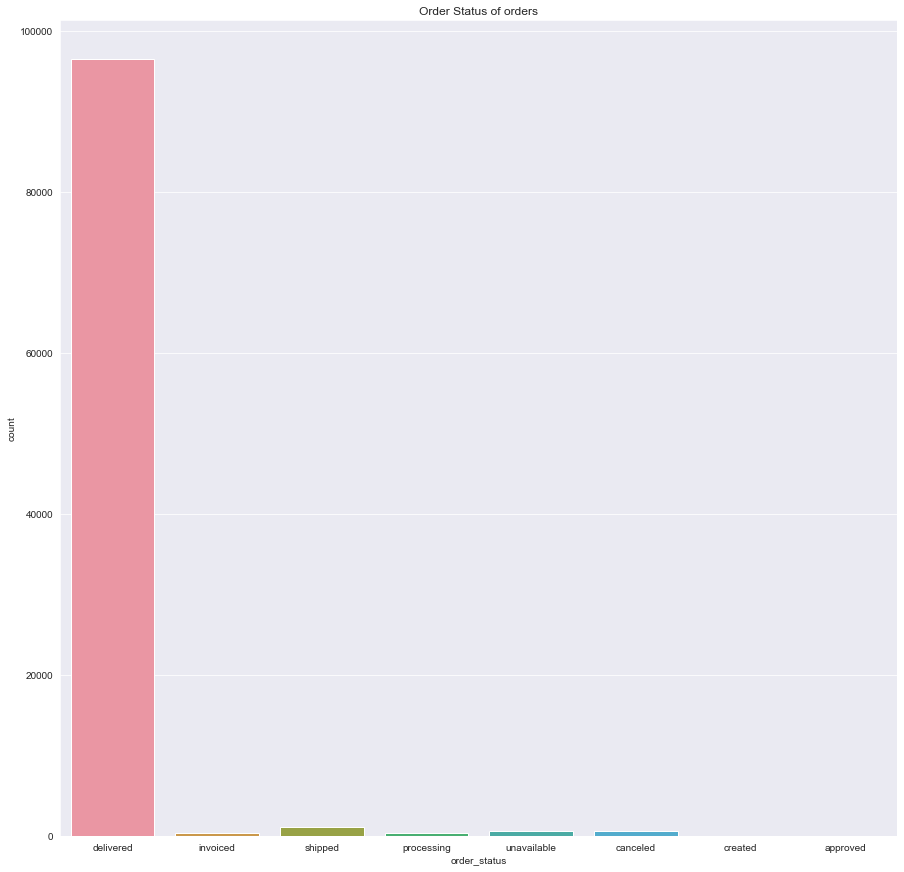

In [241]:
plt.figure(figsize=(15,15))
sns.countplot(orders['order_status'])
plt.title('Order Status of orders')


Here most of the orders are delivered, however there are very few orders which are unavailable/shipped/cancelled etc.

In [242]:
orders=pd.read_csv('orders.csv')
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,02-10-2017 10:56,02-10-2017 11:07,10-10-2017 21:25,18-10-2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,24-07-2018 20:41,26-07-2018 03:24,07-08-2018 15:27,13-08-2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,08-08-2018 08:38,08-08-2018 08:55,17-08-2018 18:06,04-09-2018 00:00


In [243]:
delivered=orders[orders['order_status']=='delivered']

In [244]:
delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 7 columns):
order_id                         96478 non-null object
customer_id                      96478 non-null object
order_status                     96478 non-null object
order_purchase_timestamp         96478 non-null object
order_approved_at                96464 non-null object
order_delivered_timestamp        96470 non-null object
order_estimated_delivery_date    96478 non-null object
dtypes: object(7)
memory usage: 5.9+ MB


We will drop null values for now to carry out primary EDA

In [245]:
delivered.dropna(subset=['order_delivered_timestamp'],inplace=True)

In [246]:
delivery_date=[]
for i in delivered.order_delivered_timestamp:
    if i != np.NaN:
        i=str(i)
        a=i.split(' ')[0]
        delivery_date.append(a)
from datetime import datetime
del_date=[]
for i in delivery_date:
    if i != np.NaN:
        a=datetime.strptime(i,'%d-%m-%Y')
        del_date.append(a)
delivered['actual_delivery_date']=del_date
estimated_date=[]
for i in delivered.order_estimated_delivery_date:
    if i != np.NaN:
        i=str(i)
        a=i.split(' ')[0]
        estimated_date.append(a)
est_date=[]
for i in estimated_date:
    if i != np.NaN:
        a=datetime.strptime(i,'%d-%m-%Y')
        est_date.append(a)
delivered['estimated_delivery_date']=est_date
delivered['delay']=delivered['actual_delivery_date']-delivered['estimated_delivery_date']

In [247]:
day_delay=[]
for i in delivered['delay']:
    i=str(i)
    a=i.split(' ')[0]
    a=int(a)
    day_delay.append(a)

In [248]:
delivered['delay']=day_delay

In [249]:
delivered=pd.merge(delivered,customers,how='inner',on='customer_id')

# STATEWISE DELAY OF ORDER DELIVERY

Text(0.5, 1.0, 'State-Wise Delay of Order Delivery')

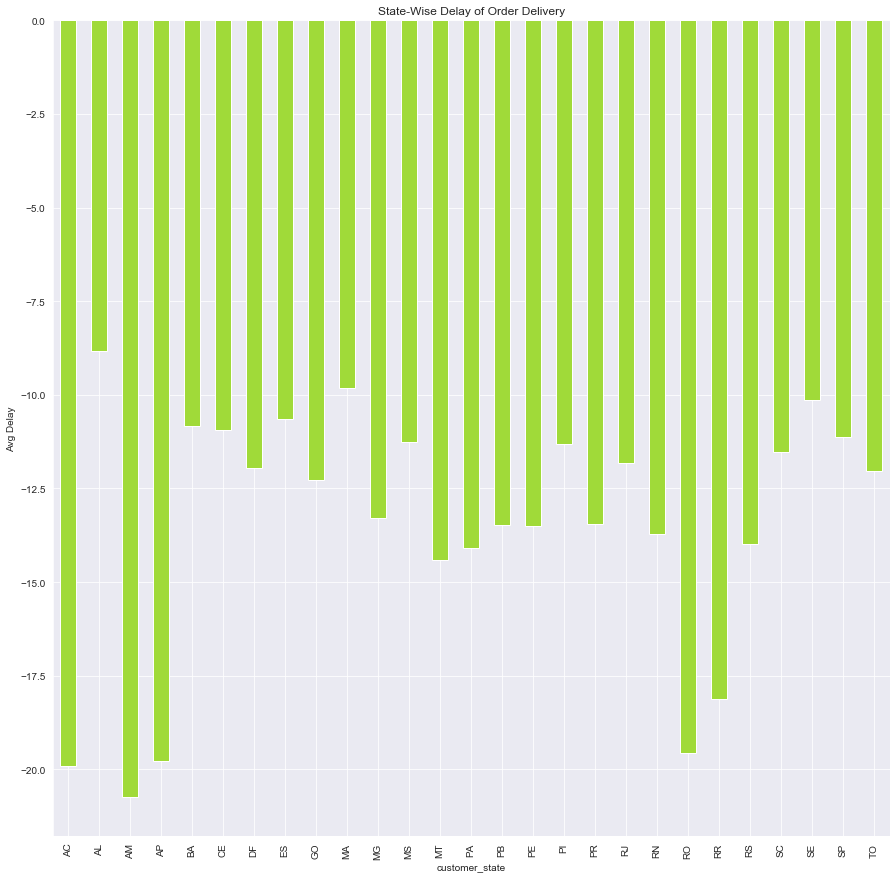

In [250]:
plt.figure(figsize=(15,15))
delivered.groupby('customer_state').delay.mean().plot(kind='bar')
plt.ylabel('Avg Delay')
plt.title('State-Wise Delay of Order Delivery')

On an average, delivery of product is early than the estimated

In [251]:
late_del=delivered[delivered['delay']>0]
late_del.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,actual_delivery_date,estimated_delivery_date,delay,customer_zip_code_prefix,customer_city,customer_state
28,203096f03d82e0dffbc41ebc2e2bcfb7,d699688533772c15a061e8ce81cb56df,delivered,18-09-2017 14:31,19-09-2017 04:04,09-10-2017 22:23,28-09-2017 00:00,2017-10-09,2017-09-28,11,4001,sao paulo,SP
33,fbf9ac61453ac646ce8ad9783d7d0af6,a25d5f94840d3c6a1a49f271ed83f4ec,delivered,20-02-2018 23:46,22-02-2018 02:30,21-03-2018 22:03,12-03-2018 00:00,2018-03-21,2018-03-12,9,21715,rio de janeiro,RJ
49,6ea2f835b4556291ffdc53fa0b3b95e8,3e4fd73f1e86b135b9b121d6abbe9597,delivered,24-11-2017 21:27,25-11-2017 00:21,28-12-2017 18:59,21-12-2017 00:00,2017-12-28,2017-12-21,7,19400,presidente venceslau,SP
67,66e4624ae69e7dc89bd50222b59f581f,ddf60e20e6e262e2136801ce5cd628b0,delivered,09-03-2018 14:50,09-03-2018 15:40,03-04-2018 13:28,02-04-2018 00:00,2018-04-03,2018-04-02,1,49030,aracaju,SE
68,a685d016c8a26f71a0bb67821070e398,51838d41add414a0b1b989b7d251d9ee,delivered,13-03-2017 18:14,13-03-2017 18:14,06-04-2017 13:37,30-03-2017 00:00,2017-04-06,2017-03-30,7,13068,campinas,SP


In [252]:
late_del.shape

(6944, 13)

# STATEWISE DELAYED DELIVERIES

Text(0.5, 1.0, 'State-Wise Delayed Deliveries')

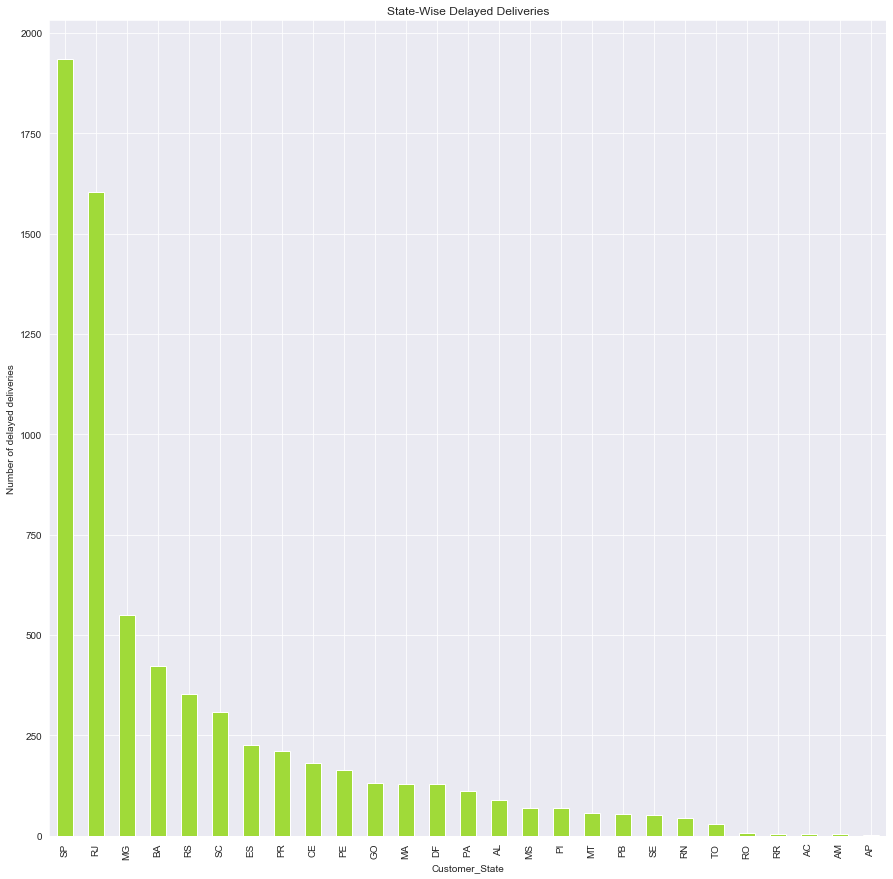

In [253]:
plt.figure(figsize=(15,15))
late_del['customer_state'].value_counts().plot(kind='bar')
plt.xlabel('Customer_State')
plt.ylabel('Number of delayed deliveries')
plt.title('State-Wise Delayed Deliveries')

Most of the delays are from Sao Paulo and Rio De Jenerio

In [254]:
late_del=pd.merge(late_del,retail_dataset,how='inner',on='order_id')


# PRODUCT CATEGORY WISE DELAYS

Text(0.5, 1.0, 'Product Category-Wise Delays')

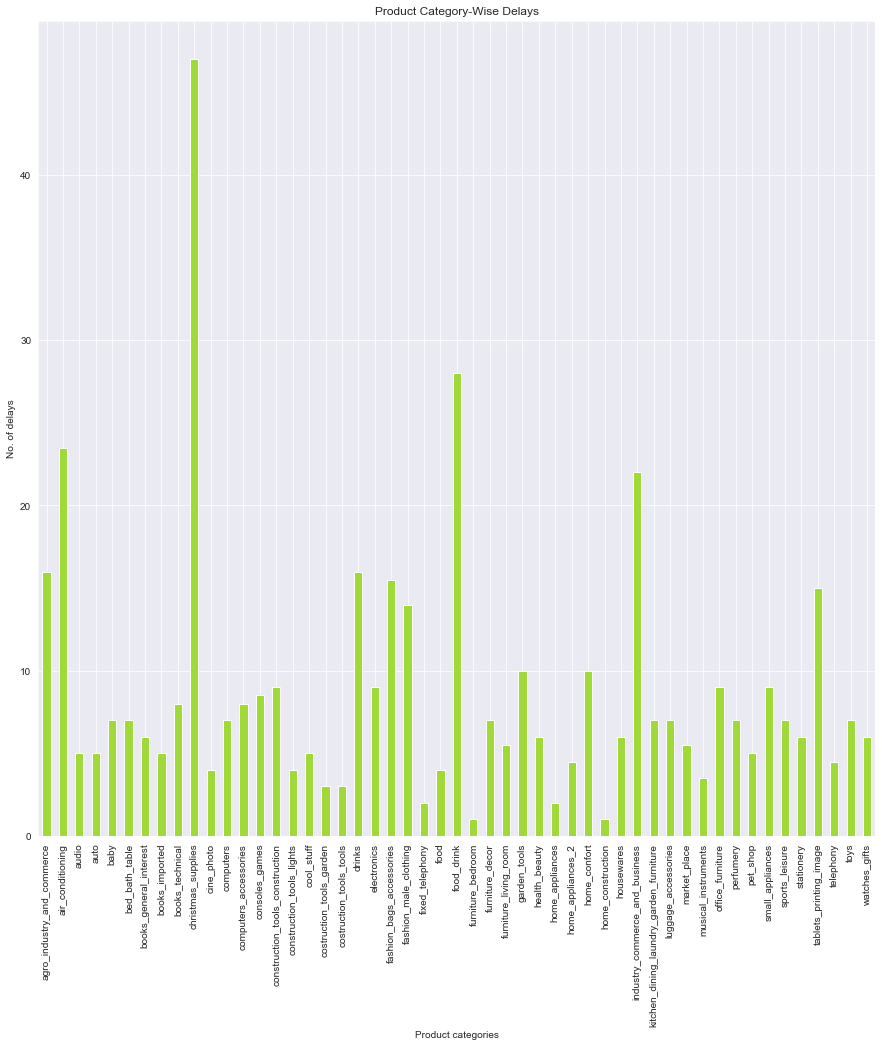

In [255]:
plt.figure(figsize=(15,15))
late_del.groupby('product_category_name').delay.median().plot(kind='bar')
plt.xlabel('Product categories')
plt.ylabel('No. of delays')
plt.title('Product Category-Wise Delays')

Food categories has the most number of delayed deliveries which is quite concerning, there are few deliveries in computers_accessories  and industry_commerce and business.

In [256]:
customers=pd.read_csv('customers.csv')
customers.head(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [257]:
delivered=delivered.sort_values('customer_id',axis=0)

In [258]:
delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,actual_delivery_date,estimated_delivery_date,delay,customer_zip_code_prefix,customer_city,customer_state
58950,e22acc9c116caa3f2b7121bbb380d08e,0000366f3b9a7992bf8c76cfdf3221e2,delivered,10-05-2018 10:56,10-05-2018 11:11,16-05-2018 20:48,21-05-2018 00:00,2018-05-16,2018-05-21,-5,7787,cajamar,SP
79976,3594e05a005ac4d06a72673270ef9ec9,0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,07-05-2018 11:11,07-05-2018 18:25,10-05-2018 18:02,15-05-2018 00:00,2018-05-10,2018-05-15,-5,6053,osasco,SP
31038,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,delivered,10-03-2017 21:05,10-03-2017 21:05,05-04-2017 14:38,07-04-2017 00:00,2017-04-05,2017-04-07,-2,88115,sao jose,SC
103175,41272756ecddd9a9ed0180413cc22fb6,0000f6ccb0745a6a4b88665a16c9f078,delivered,12-10-2017 20:29,12-10-2017 20:49,01-11-2017 21:23,13-11-2017 00:00,2017-11-01,2017-11-13,-12,66812,belem,PA
47322,d957021f1127559cd947b62533f484f7,0004aac84e0df4da2b147fca70cf8255,delivered,14-11-2017 19:45,14-11-2017 20:06,27-11-2017 23:08,05-12-2017 00:00,2017-11-27,2017-12-05,-8,18040,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92531,725cf8e9c24e679a8a5a32cb92c9ce1e,fffcf5a5ff07b0908bd4e2dbc735a684,delivered,08-06-2017 21:00,08-06-2017 21:15,06-07-2017 09:22,02-08-2017 00:00,2017-07-06,2017-08-02,-27,55250,sanharo,PE
24505,c71b9252fd7b3b263aaa4cb09319a323,fffea47cd6d3cc0a88bd621562a9d061,delivered,10-12-2017 20:07,10-12-2017 20:16,09-01-2018 22:28,12-01-2018 00:00,2018-01-09,2018-01-12,-3,44054,feira de santana,BA
49746,fdc45e6c7555e6cb3cc0daca2557dbe1,ffff371b4d645b6ecea244b27531430a,delivered,07-02-2017 15:49,07-02-2017 16:02,22-02-2017 12:45,24-03-2017 00:00,2017-02-22,2017-03-24,-30,78552,sinop,MT
101680,94d3ee0bc2a0af9d4fa47a4d63616e8d,ffff5962728ec6157033ef9805bacc48,delivered,02-05-2018 15:17,02-05-2018 15:58,14-05-2018 11:54,28-05-2018 00:00,2018-05-14,2018-05-28,-14,29460,bom jesus do norte,ES


In [259]:
cust=customers.sort_values('customer_id',axis=0)


In [260]:
cust_del=pd.merge(delivered,cust,how='inner',on='customer_id')

In [261]:
cust_del.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,actual_delivery_date,estimated_delivery_date,delay,customer_zip_code_prefix_x,customer_city_x,customer_state_x,customer_zip_code_prefix_y,customer_city_y,customer_state_y
0,e22acc9c116caa3f2b7121bbb380d08e,0000366f3b9a7992bf8c76cfdf3221e2,delivered,10-05-2018 10:56,10-05-2018 11:11,16-05-2018 20:48,21-05-2018 00:00,2018-05-16,2018-05-21,-5,7787,cajamar,SP,7787,cajamar,SP
1,3594e05a005ac4d06a72673270ef9ec9,0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,07-05-2018 11:11,07-05-2018 18:25,10-05-2018 18:02,15-05-2018 00:00,2018-05-10,2018-05-15,-5,6053,osasco,SP,6053,osasco,SP
2,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,delivered,10-03-2017 21:05,10-03-2017 21:05,05-04-2017 14:38,07-04-2017 00:00,2017-04-05,2017-04-07,-2,88115,sao jose,SC,88115,sao jose,SC
3,41272756ecddd9a9ed0180413cc22fb6,0000f6ccb0745a6a4b88665a16c9f078,delivered,12-10-2017 20:29,12-10-2017 20:49,01-11-2017 21:23,13-11-2017 00:00,2017-11-01,2017-11-13,-12,66812,belem,PA,66812,belem,PA
4,d957021f1127559cd947b62533f484f7,0004aac84e0df4da2b147fca70cf8255,delivered,14-11-2017 19:45,14-11-2017 20:06,27-11-2017 23:08,05-12-2017 00:00,2017-11-27,2017-12-05,-8,18040,sorocaba,SP,18040,sorocaba,SP


# STATEWISE DISTRIBUTION OF CUSTOMERS

Number of products people usually order

Text(0, 0.5, 'No. of Customers')

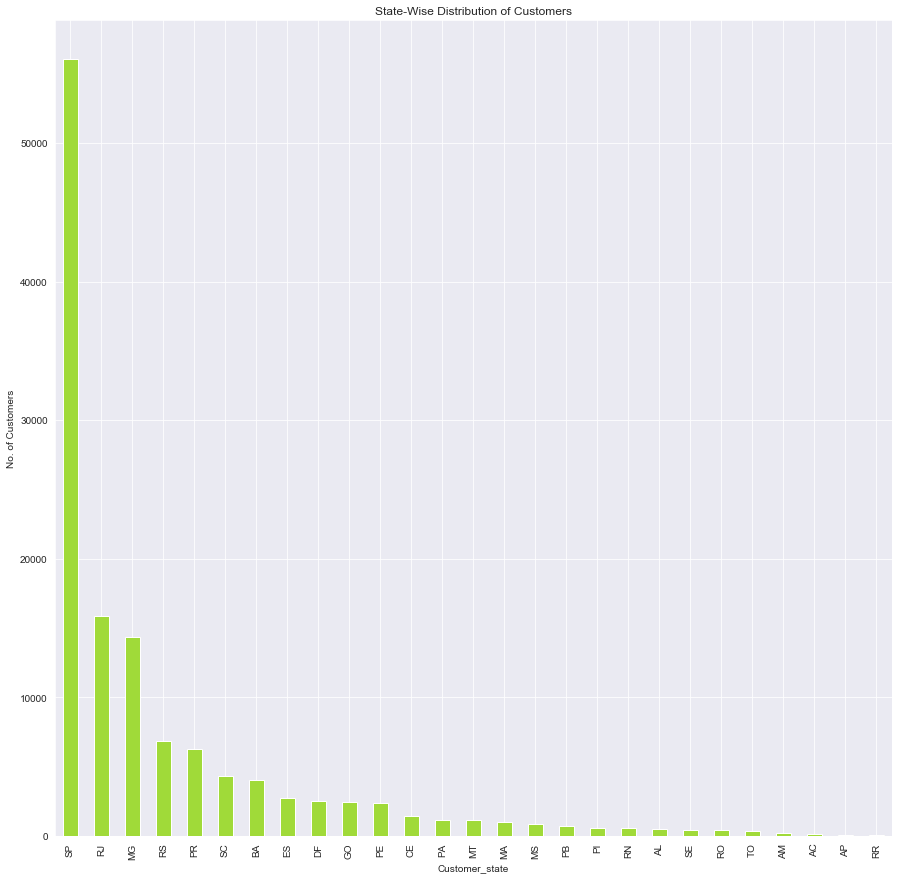

In [262]:
plt.figure(figsize=(15,15))
cust_del.customer_state_y.value_counts().plot(kind='bar')
plt.title('State-Wise Distribution of Customers')
plt.xlabel('Customer_state')
plt.ylabel('No. of Customers')

Most of the customers are from Sao Paulo. As a result of this, there is more sales in Sao Paulo

In [263]:
most_product=retail_dataset.groupby('product_category_name').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()
most_product.head()

,product_category_name,order_count
0,toys,95727
1,health_beauty,3389
2,bed_bath_table,3094
3,sports_leisure,2641
4,furniture_decor,2504


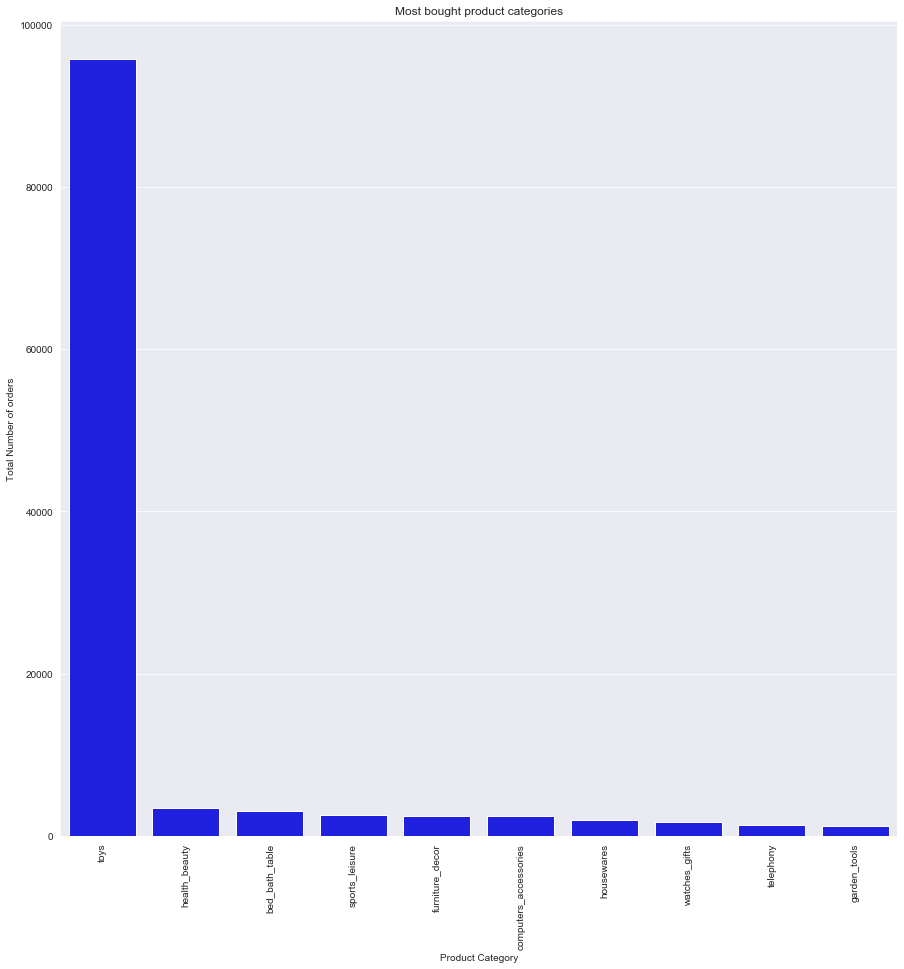

In [264]:
sns.barplot(x='product_category_name',y='order_count',data=most_product[:10],color="blue")
plt.xlabel("Product Category")
plt.ylabel("Total Number of orders")
plt.title("Most bought product categories")
plt.xticks(rotation='vertical')
plt.show()

In [265]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128585 entries, 0 to 128584
Data columns (total 24 columns):
customer_id                      128585 non-null object
customer_zip_code_prefix         128585 non-null int64
customer_city                    128585 non-null object
customer_state                   128585 non-null object
product_id                       127598 non-null object
product_category_name            127122 non-null object
product_weight_g                 127573 non-null float64
product_length_cm                127573 non-null float64
product_height_cm                127573 non-null float64
product_width_cm                 127573 non-null float64
order_id                         128585 non-null object
order_item_id                    127598 non-null float64
seller_id                        127598 non-null object
price                            127598 non-null float64
shipping_charges                 127598 non-null float64
payment_sequential               128582 non

In [266]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])

In [267]:
## Create new columns for date,day,time,month:
orders['weekday']=orders['order_purchase_timestamp'].dt.weekday_name
orders['year']=orders['order_purchase_timestamp'].dt.year
orders['monthday']=orders['order_purchase_timestamp'].dt.day  
orders['weekday'] = orders['order_purchase_timestamp'].dt.weekday
orders['month']=orders['order_purchase_timestamp'].dt.month
orders['hour']=orders['order_purchase_timestamp'].dt.hour

In [268]:
monthly_orders = pd.DataFrame(orders.groupby(['month'])['month'].count())

In [269]:
monthly_orders

,month
month,
1,8374
2,8189
3,9327
4,9099
5,9311
6,8969
7,10301
8,9054
9,5887


In [270]:
#importing all plotly libraries
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# MONTHLY ORDER TRENDS

In [271]:
fig = go.Figure(data=go.Scatter(x=monthly_orders.index,
                                y=monthly_orders['month'],
                                mode='lines+markers')) # hover text goes here
fig.update_layout(title='Months With Most Orders',xaxis_title="Month",yaxis_title="Number of Orders")
fig.update_yaxes(type="log")
fig.show()

In [272]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null object
order_delivered_timestamp        96476 non-null object
order_estimated_delivery_date    99441 non-null object
weekday                          99441 non-null int64
year                             99441 non-null int64
monthday                         99441 non-null int64
month                            99441 non-null int64
hour                             99441 non-null int64
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 9.1+ MB


In [273]:
retail_dataset_new=retail_dataset.merge(orders,on='order_id',how='outer')
retail_dataset_new

,customer_id_x,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_timestamp_y,order_estimated_delivery_date_y,weekday,year,monthday,month,hour
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,toys,8683.0,54.0,64.0,31.0,...,delivered,2017-05-16 15:05:00,16-05-2017 15:22,25-05-2017 10:35,05-06-2017 00:00,1,2017,16,5,15
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,housewares,10150.0,89.0,15.0,40.0,...,delivered,2018-12-01 20:48:00,12-01-2018 20:58,29-01-2018 12:41,06-02-2018 00:00,5,2018,1,12,20
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,bd07b66896d6f1494f5b86251848ced7,toys,8267.0,52.0,52.0,17.0,...,delivered,2018-05-19 16:07:00,20-05-2018 16:19,14-06-2018 17:58,13-06-2018 00:00,5,2018,19,5,16
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,a5647c44af977b148e0a3a4751a09e2e,office_furniture,12160.0,56.0,51.0,28.0,...,delivered,2018-03-13 16:06:00,13-03-2018 17:29,28-03-2018 16:04,10-04-2018 00:00,1,2018,13,3,16
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,9391a573abe00141c56e38d84d7d5b3b,toys,5200.0,45.0,15.0,35.0,...,delivered,2018-07-29 09:51:00,29-07-2018 10:10,09-08-2018 20:55,15-08-2018 00:00,6,2018,29,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128580,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,ccb4503d9d43d245d3b295d0544f988b,toys,611.0,22.0,22.0,23.0,...,delivered,2018-07-04 15:48:00,07-04-2018 16:08,13-04-2018 20:06,25-04-2018 00:00,2,2018,4,7,15
128581,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ede6b0570a75a4b9de4f383329f99ee,toys,1211.0,25.0,24.0,22.0,...,delivered,2018-04-04 08:20:00,04-04-2018 08:35,11-04-2018 18:54,20-04-2018 00:00,2,2018,4,4,8
128582,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,7a5d2e1e131a860ae7d18f6fffa9d689,toys,870.0,25.0,20.0,18.0,...,delivered,2018-08-04 20:11:00,08-04-2018 20:30,09-05-2018 19:03,02-05-2018 00:00,5,2018,4,8,20
128583,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,f819f0c84a64f02d3a5606ca95edd272,toys,710.0,19.0,13.0,14.0,...,delivered,2017-03-11 21:08:00,03-11-2017 21:31,16-11-2017 19:58,05-12-2017 00:00,5,2017,11,3,21


In [274]:
retail_dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128585 entries, 0 to 128584
Data columns (total 35 columns):
customer_id_x                      128585 non-null object
customer_zip_code_prefix           128585 non-null int64
customer_city                      128585 non-null object
customer_state                     128585 non-null object
product_id                         127598 non-null object
product_category_name              127122 non-null object
product_weight_g                   127573 non-null float64
product_length_cm                  127573 non-null float64
product_height_cm                  127573 non-null float64
product_width_cm                   127573 non-null float64
order_id                           128585 non-null object
order_item_id                      127598 non-null float64
seller_id                          127598 non-null object
price                              127598 non-null float64
shipping_charges                   127598 non-null float64
payment_seque

# TRANSACTION VALUE BY YEAR

Text(0.5, 1.0, 'Transaction Value by Year')

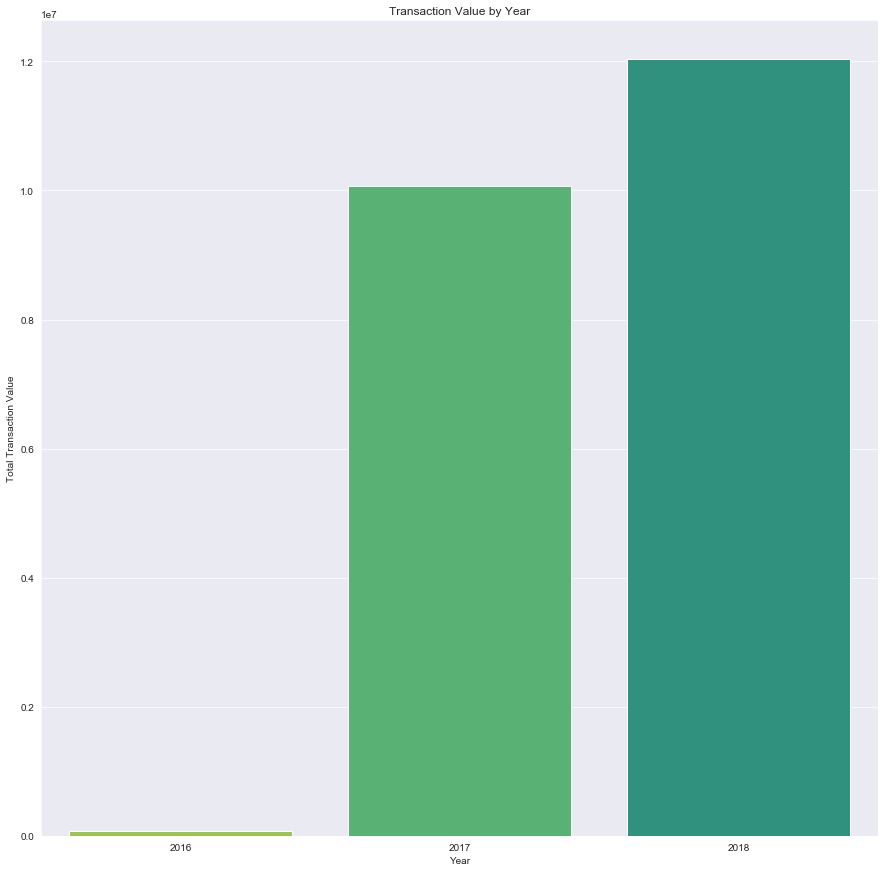

In [275]:
trend_year=pd.DataFrame(retail_dataset_new.groupby('year')['payment_value'].sum().sort_values(ascending=False)).reset_index()
ax=sns.barplot(x='year',y='payment_value',data=trend_year,palette=sns.set_palette(palette='viridis_r'))
#ax.ticklabel_format()
ax.set_xlabel('Year')
ax.set_ylabel('Total Transaction Value')
ax.set_title('Transaction Value by Year')

# PURCHASE TREND BY MONTHS

In [276]:
import calendar

The data is available from Sept 2016 to Sept 2018 . Therefore we see a very low sales for the year 2016 .Entire year data is available for 2017 and hence that year is on the higher side whereas sales till Sept for 2018 is plotted.For lack of entire data,we are unable to conclude any significant findings here.

Text(0.5, 1.0, 'Months')

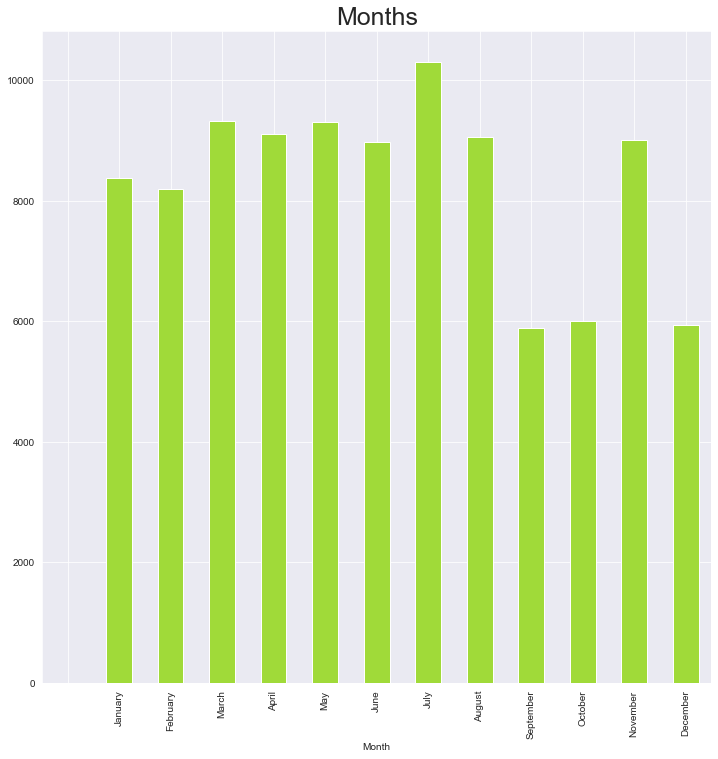

In [277]:
orders['Month'] = pd.Series(pd.Categorical(orders['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
orders['Month']
orders.groupby('Month').size().plot(
    kind = 'bar',
    figsize=(12,12)
)
plt.title('Months',fontsize=25)

Text(0.5, 1.0, 'Months')

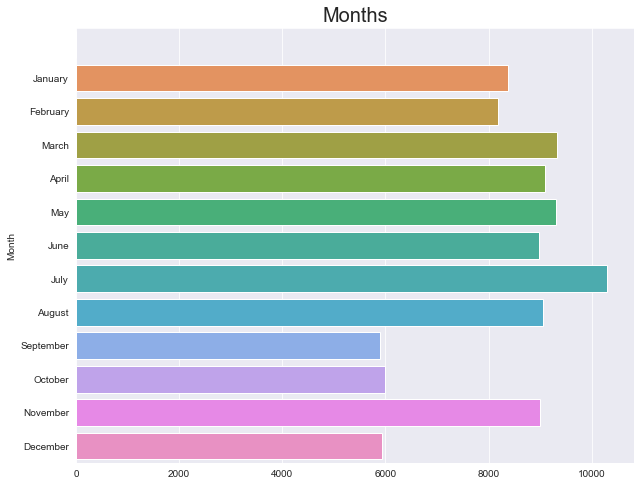

In [278]:
month = orders.groupby('Month').size().sort_values()
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=month.index, x=month.values)
plt.title('Months',fontsize=20)

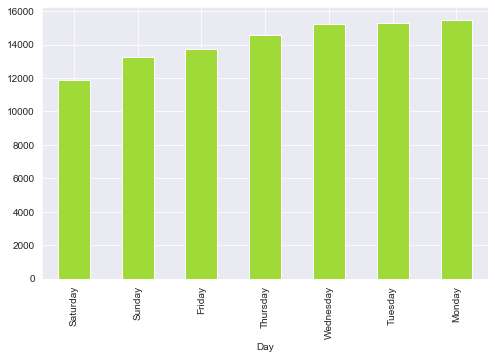

In [279]:
orders['Day'] = pd.Series(pd.Categorical(orders['order_purchase_timestamp'].dt.day_name(), categories=list(calendar.day_name)))
orders.groupby('Day').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

# TOP 10 PRODUCT CATEGORY

Text(0.5, 1.0, 'Top 10 product category')

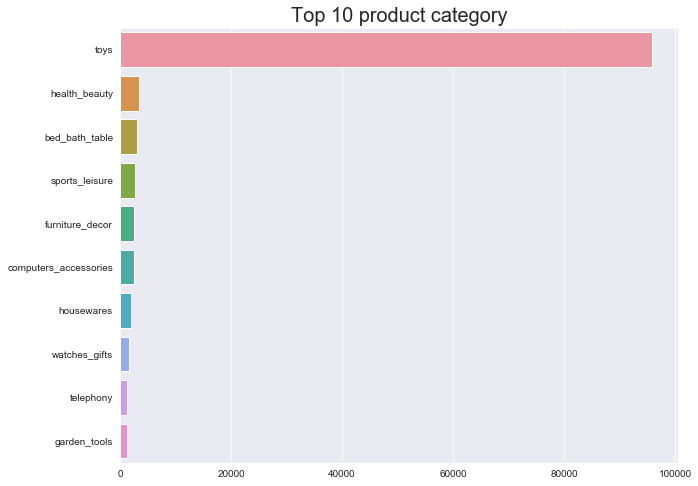

In [280]:
top_10_category = retail_dataset["product_category_name"].value_counts().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_category.index, x=top_10_category.values)
plt.title('Top 10 product category',fontsize=20)

In [281]:
top_10_category

toys                     95727
health_beauty             3389
bed_bath_table            3094
sports_leisure            2641
furniture_decor           2504
computers_accessories     2461
housewares                1926
watches_gifts             1685
telephony                 1318
garden_tools              1187
Name: product_category_name, dtype: int64

# AVERAGE SPENDS BY PRODUCT CATEGORY

In [282]:
average_price = retail_dataset.groupby("product_category_name")["payment_value"].agg(np.mean).sort_values()
average_price 


product_category_name
flowers                                    46.239091
audio                                      57.589510
fashion_underwear_beach                    70.183333
home_comfort_2                             71.710000
fashio_female_clothing                     78.056000
                                            ...     
drinks                                    512.187681
home_appliances_2                         520.516699
small_appliances_home_oven_and_coffee     679.500667
fixed_telephony                           814.124531
computers                                1033.909718
Name: payment_value, Length: 70, dtype: float64

Text(0.5, 1.0, 'average_price')

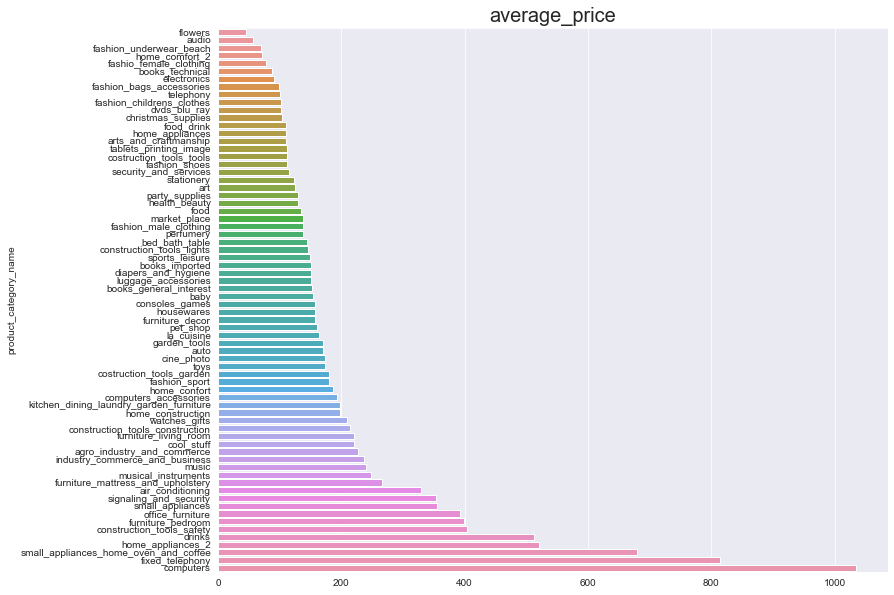

In [283]:
fig=plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.barplot(y=average_price.index, x=average_price.values)
plt.title('average_price',fontsize=20)

In [284]:
average_price.sample(10)

product_category_name
construction_tools_construction    214.094220
auto                               170.707802
home_comfort_2                      71.710000
perfumery                          138.360086
la_cuisine                         164.116000
flowers                             46.239091
costruction_tools_garden           180.138286
fashion_male_clothing              137.693226
christmas_supplies                 104.405625
office_furniture                   392.226500
Name: payment_value, dtype: float64

In [285]:
top_category = retail_dataset[retail_dataset['product_category_name'].isin(top_10_category.index)]
price_top_category=round(top_category.groupby("product_category_name")["price"].agg(np.mean).sort_values(ascending=False), 2)
price_top_category

product_category_name
watches_gifts            180.09
toys                     120.54
computers_accessories    110.49
sports_leisure           108.45
garden_tools             107.16
health_beauty             98.01
housewares                94.46
bed_bath_table            89.86
furniture_decor           86.06
telephony                 64.73
Name: price, dtype: float64

Text(0.5, 1.0, 'average_price')

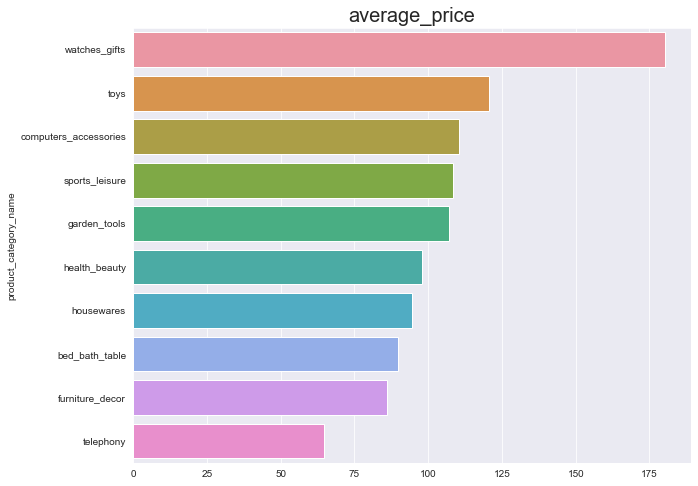

In [286]:
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=price_top_category.index, x=price_top_category.values)
plt.title('average_price',fontsize=20)

# PIECHART OF PAYMENTS TYPES

In [287]:
retail_dataset.payment_type.sample(15)

58436     credit_card
980       credit_card
30891          wallet
44892     credit_card
7581      credit_card
55886          wallet
46954     credit_card
16925     credit_card
57332     credit_card
115193         wallet
31775     credit_card
51531     credit_card
36215     credit_card
99615     credit_card
10361          wallet
Name: payment_type, dtype: object

In [288]:
retail_dataset.payment_type.nunique()

5

In [289]:
retail_dataset.payment_type.unique()

array(['credit_card', 'debit_card', 'voucher', 'wallet', 'not_defined',
       nan], dtype=object)

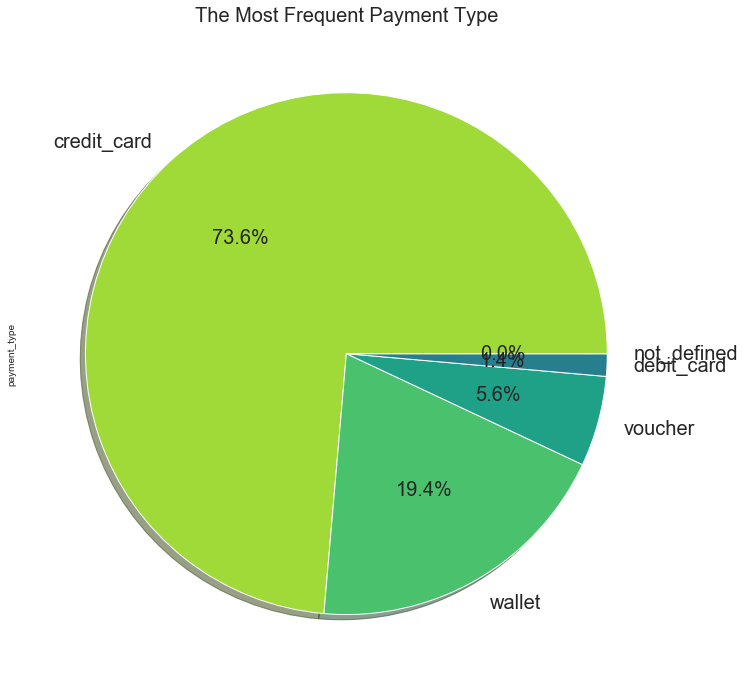

In [290]:
retail_dataset["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(12,12),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=20);

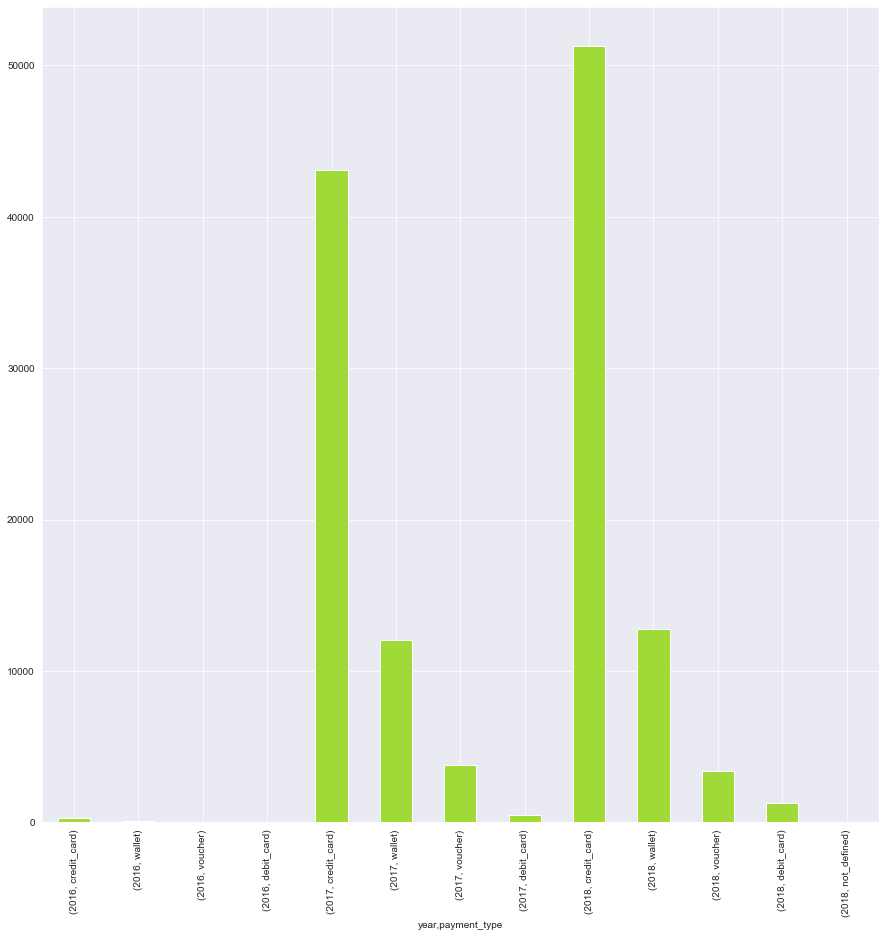

In [291]:
retail_dataset_new.groupby("year")['payment_type'].value_counts().plot(kind='bar')

*The most common payment method is "Credit Card".

# MOST CUSTOMERS BY STATES

In [292]:
top_states=retail_dataset['customer_state'].value_counts()
top_states

SP    54561
RJ    16765
MG    14827
RS     7148
PR     6488
SC     4651
BA     4388
DF     2655
GO     2624
ES     2559
PE     2103
CE     1624
MT     1208
PA     1184
MA      932
MS      904
PB      697
PI      609
RN      597
AL      486
SE      434
TO      356
RO      344
AM      193
AC      105
AP       88
RR       55
Name: customer_state, dtype: int64

Text(0.5, 1.0, 'states')

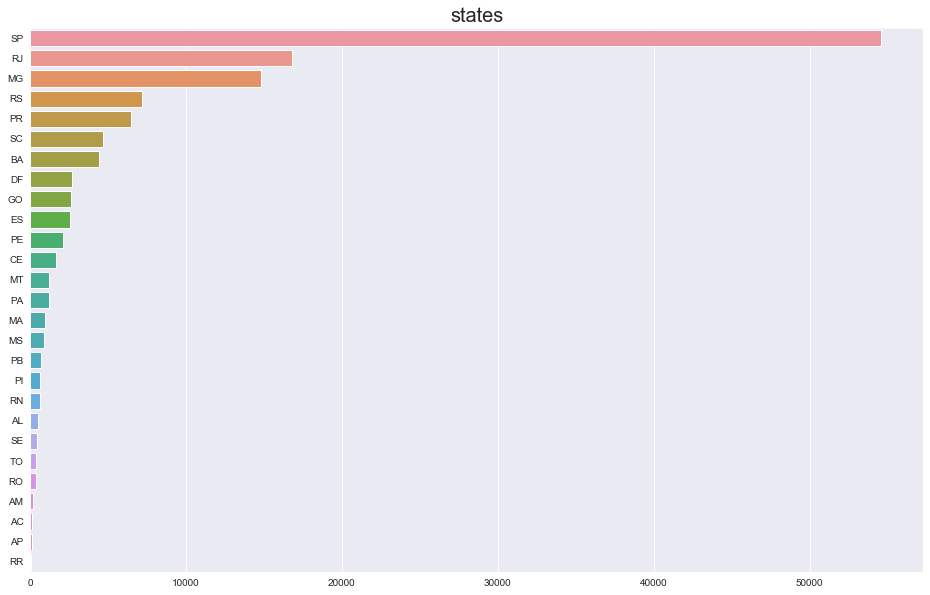

In [293]:
fig=plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.barplot(y=top_states.index, x=top_states.values)
plt.title('states',fontsize=20)

- Most customers are from Sao Paulo, followed by Rio de Janeiro

# PRODUCTWISE REVENUE CATEGORY

In [294]:

pd.DataFrame(retail_dataset.groupby('product_category_name').price.sum()).sort_values(by='price',ascending=False)

,price
product_category_name,
toys,1.153864e+07
health_beauty,3.321690e+05
watches_gifts,3.034446e+05
sports_leisure,2.864140e+05
bed_bath_table,2.780126e+05
...,...
fashio_female_clothing,2.711900e+02
fashion_childrens_clothes,1.799800e+02
diapers_and_hygiene,1.349000e+02


Text(0.5, 1.0, 'Product Category-Wise Revenue Generated')

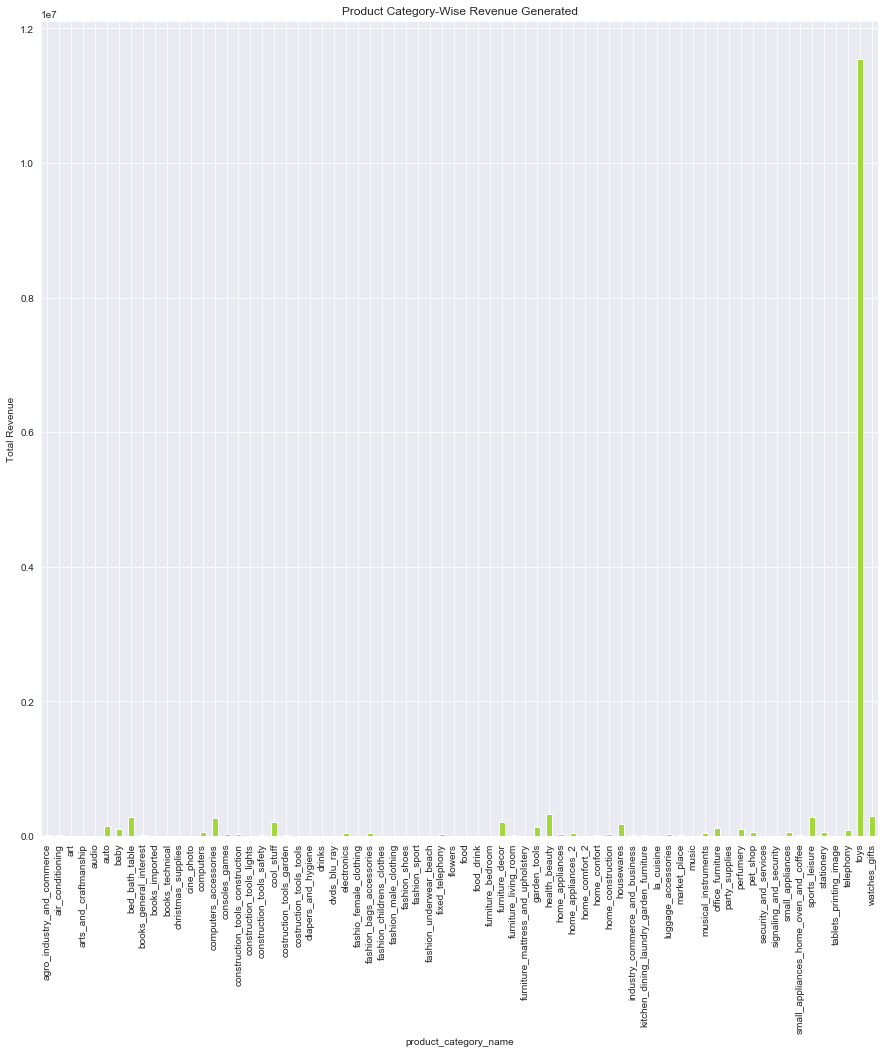

In [295]:
plt.figure(figsize=(15,15))
retail_dataset.groupby('product_category_name').price.sum().plot(kind='bar')
plt.ylabel('Total Revenue')
plt.title('Product Category-Wise Revenue Generated')

Toys is the highest revenue generator

In [296]:
retail_dataset.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,toys,8683.0,54.0,64.0,31.0,...,21.88,1.0,credit_card,2.0,146.87,delivered,16-05-2017 15:05,16-05-2017 15:22,25-05-2017 10:35,05-06-2017 00:00
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,housewares,10150.0,89.0,15.0,40.0,...,46.48,1.0,credit_card,8.0,335.48,delivered,12-01-2018 20:48,12-01-2018 20:58,29-01-2018 12:41,06-02-2018 00:00
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,bd07b66896d6f1494f5b86251848ced7,toys,8267.0,52.0,52.0,17.0,...,17.79,1.0,credit_card,7.0,157.73,delivered,19-05-2018 16:07,20-05-2018 16:19,14-06-2018 17:58,13-06-2018 00:00
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,a5647c44af977b148e0a3a4751a09e2e,office_furniture,12160.0,56.0,51.0,28.0,...,23.36,1.0,credit_card,1.0,173.30,delivered,13-03-2018 16:06,13-03-2018 17:29,28-03-2018 16:04,10-04-2018 00:00
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,9391a573abe00141c56e38d84d7d5b3b,toys,5200.0,45.0,15.0,35.0,...,22.25,1.0,credit_card,8.0,252.25,delivered,29-07-2018 09:51,29-07-2018 10:10,09-08-2018 20:55,15-08-2018 00:00


In [297]:
retail_dataset.insert(7, 'quantity',1)
retail_dataset.shape

(128585, 25)

In [298]:
#Total no. of unique orders and products
retail_dataset.describe()

,customer_zip_code_prefix,product_weight_g,quantity,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,shipping_charges,payment_sequential,payment_installments,payment_value
count,128585.000000,127573.000000,128585.0,127573.000000,127573.000000,127573.000000,127598.000000,127598.000000,127598.000000,128582.000000,128582.000000,128582.000000
mean,34875.289349,2096.463186,1.0,30.249034,16.542999,23.070023,1.204980,119.157492,19.944677,1.099384,2.967639,172.549213
std,29828.007665,3771.360652,0.0,16.154647,13.382928,11.743075,0.712931,181.393416,15.673397,0.764686,2.807984,265.233890
min,1003.000000,0.000000,1.0,7.000000,2.000000,6.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,11065.000000,300.000000,1.0,18.000000,8.000000,15.000000,1.000000,39.900000,13.010000,1.000000,1.000000,60.582500
50%,24220.000000,700.000000,1.0,25.000000,13.000000,20.000000,1.000000,73.500000,16.250000,1.000000,2.000000,107.890000
75%,58067.000000,1800.000000,1.0,38.000000,20.000000,30.000000,1.000000,131.990000,21.150000,1.000000,4.000000,189.370000
max,99990.000000,40425.000000,1.0,105.000000,105.000000,118.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000


If your dataset has a count of order numbers as huge as 1 million, then you can choose to drop some products that were purchased just once or below some threshold. Here I would take a threshold of 10. This would ensure not to overburden the system while giving you the best results.

No point in deriving relations out of products that were rarely purchased, right

In [299]:
retail_dataset['product_id'].value_counts()

99a4788cb24856965c36a24e339b6058    563
aca2eb7d00ea1a7b8ebd4e68314663af    547
422879e10f46682990de24d770e7f83d    544
389d119b48cf3043d311335e499d9c6b    444
53759a2ecddad2bb87a079a1f1519f73    423
                                   ... 
6c8353ee35a281d45677fc3715958586      1
dd0c92095e24c0592ff858d2c4837a78      1
a762a89bb77b378d0b434ad75671b8e1      1
68ea0193be80f4865155be5c96c58f43      1
a5c90160c3e379f7a99ea8052e6c5f9e      1
Name: product_id, Length: 32951, dtype: int64

In [300]:
item_frequency=retail_dataset['product_id'].value_counts()
retail_dataset=retail_dataset[retail_dataset.isin(item_frequency.index[item_frequency>=10]).values]
retail_dataset['product_id'].value_counts()

99a4788cb24856965c36a24e339b6058    563
aca2eb7d00ea1a7b8ebd4e68314663af    547
422879e10f46682990de24d770e7f83d    544
389d119b48cf3043d311335e499d9c6b    444
53759a2ecddad2bb87a079a1f1519f73    423
                                   ... 
9e2ce829b01f3d1a0a9d5ddf7ee21864     10
60a8d8f0434c4531bf310eebf9f19cfe     10
00210e41887c2a8ef9f791ebc780cc36     10
ea20f928ceaa7f146fe62a0cc8413ee5     10
e5f3a09149ee7db697907f61e7366267     10
Name: product_id, Length: 2358, dtype: int64

With this we consider only the products that were purchased for a min. of 10 times.

In [301]:
#Average products purchased per transaction
retail_dataset['order_id'].value_counts().mean()

1.3077943473330624

Recommend similar products using Apriori
For a detailed explanation, please refer KDnuggets

Things to do:

Create a basket of all products, orders and quantity
Perform One hot encoding so as to convert all quantities into format suitable for apriori algorithm
Build list of frequent itemsets
Generate rules based on your requirements

In [302]:
#Create a basket of all products, orders and quantity
basket=(retail_dataset.groupby(['order_id','product_id'])['quantity']).sum().unstack().reset_index().fillna(0).set_index('order_id')
basket.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,002159fe700ed3521f46cfcf6e941c76,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,00878d953636afec00d3e85d55a12e7f,008cff0e5792219fae03e570f980b330,00905d58c87afcbce21420b3712cacaa,00ab8a8b9fe219511dc3f178c6d79698,00ba6d766f0b1d7b78a5ce3e1e033263,...,ff29d8cb1cd0cd5ea37b80dac9939e1c,ff2c1ec09b1bb340e84f0d6b21cc7dbb,ff55834c0b3272853dfe62340f2bb91b,ff5f8606556b625613f069a5a9a48966,ff7c7524d5f9a8386ab27088ec03c1fb,ff7fccf8513f360157f0660fe51d1d88,ffa7e0cbe11656d11a117b534bb1db27,ffaf0af7eebb57c7f262b51ebb05dfd6,ffc9caf33e2d1e9f44e3e06da19085f7,ffd4bf4306745865e5692f69bd237893
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00061f2a7bc09da83e415a52dc8a4af1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006ec9db01a64e59a68b2c340bf65a7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0008288aa423d2a3f00fcb17cd7d8719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
#Convert 0.0 to 0, convert the units to One hot encoded values
def encode_units(x):
    if x<= 0:
        return 0
    if x>=1:
        return 1
    
basket_sets = basket.applymap(encode_units)
basket_sets.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,002159fe700ed3521f46cfcf6e941c76,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,00878d953636afec00d3e85d55a12e7f,008cff0e5792219fae03e570f980b330,00905d58c87afcbce21420b3712cacaa,00ab8a8b9fe219511dc3f178c6d79698,00ba6d766f0b1d7b78a5ce3e1e033263,...,ff29d8cb1cd0cd5ea37b80dac9939e1c,ff2c1ec09b1bb340e84f0d6b21cc7dbb,ff55834c0b3272853dfe62340f2bb91b,ff5f8606556b625613f069a5a9a48966,ff7c7524d5f9a8386ab27088ec03c1fb,ff7fccf8513f360157f0660fe51d1d88,ffa7e0cbe11656d11a117b534bb1db27,ffaf0af7eebb57c7f262b51ebb05dfd6,ffc9caf33e2d1e9f44e3e06da19085f7,ffd4bf4306745865e5692f69bd237893
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00061f2a7bc09da83e415a52dc8a4af1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0006ec9db01a64e59a68b2c340bf65a7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0008288aa423d2a3f00fcb17cd7d8719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Frequent Itemsets

# MARKET BASKET ANALYSIS

# Apriori Algorithm & Association Rule


Apriori algorithms is a data mining algorithm used for mining frequent itemsets and relevant association rules. It is devised to operate on a database that contain transactions -like, items bought by a customer in a store.

An itemset can be considered frequent if it meets a user-specified support threshold. For example, if the support threshold is set to 0.5(50%), a frequent itemset is a set of items that are bought/purchased together in atleast 50% of all transactions.

Association rules are a set of rules derived from a database, that can help determining relationship among variables in a large transactional database

# Measure 1: Support

This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears

If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets

# Measure 2: Confidence.

This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears

One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

# Confidence(x---->Y)=Support(X,Y)/Support(X)

# Measure 3: Lift.

This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought

# Lift (X------>Y)=Support(X,Y)/Support(X)*Support(Y)

# Steps in Apriori Algorithm

Steps in Apriori Algorithm¶
The steps in implementing Apriori Algorithm are:

Create a frequency table of all items that occur in all transactions.

Select only those (significant) items - for which the support is greater than threshold (50%)

Create possible pairs of all items (remember AB is same as BA)

Select itemsets that are only significant (support > threshold)

Create tiplets using another rule, called self-join. It says, from the item pairs AB, AC, BC, BD, we look for pairs with identical first letter. So we from AB, AC we get ABC. From BC, BD we get BCD.

Find frequency of the new triplet pairs, and select only those pairs where the support of the new itemset (ABC or BCD) is greater than the threshold.

If we get 2 pairs of significant triplets, combine and form groups of 4, repeat the threshold process, and continue.

Continue till the frequency after grouping is less than threshold support.

Pros of Apriori algorithm: Easy to understand and implement Can be used on large itemsets

Cons of Apriori algoritm Can get compuationally expensive if the candidate rules are large Calculating support is also expensive since it has to go through the whole database

In [304]:

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [305]:
retail_dataset.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_weight_g,quantity,product_length_cm,product_height_cm,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,toys,8683.0,1,54.0,64.0,...,21.88,1.0,credit_card,2.0,146.87,delivered,16-05-2017 15:05,16-05-2017 15:22,25-05-2017 10:35,05-06-2017 00:00
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,housewares,10150.0,1,89.0,15.0,...,46.48,1.0,credit_card,8.0,335.48,delivered,12-01-2018 20:48,12-01-2018 20:58,29-01-2018 12:41,06-02-2018 00:00
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,bd07b66896d6f1494f5b86251848ced7,toys,8267.0,1,52.0,52.0,...,17.79,1.0,credit_card,7.0,157.73,delivered,19-05-2018 16:07,20-05-2018 16:19,14-06-2018 17:58,13-06-2018 00:00
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,a5647c44af977b148e0a3a4751a09e2e,office_furniture,12160.0,1,56.0,51.0,...,23.36,1.0,credit_card,1.0,173.30,delivered,13-03-2018 16:06,13-03-2018 17:29,28-03-2018 16:04,10-04-2018 00:00
5,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,223d34a3d9334039f5ff9511dc044bbb,toys,900.0,1,23.0,7.0,...,37.05,1.0,credit_card,1.0,283.67,delivered,15-10-2017 12:44,15-10-2017 13:05,25-10-2017 17:00,08-11-2017 00:00


In [306]:
retail_dataset.set_index('product_category_name').head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_weight_g,quantity,product_length_cm,product_height_cm,product_width_cm,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
product_category_name,,,,,,,,,,,,,,,,,,,,,
toys,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,a9516a079e37a9c9c36b9b78b10169e8,8683.0,1,54.0,64.0,31.0,...,21.88,1.0,credit_card,2.0,146.87,delivered,16-05-2017 15:05,16-05-2017 15:22,25-05-2017 10:35,05-06-2017 00:00
housewares,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,4aa6014eceb682077f9dc4bffebc05b0,10150.0,1,89.0,15.0,40.0,...,46.48,1.0,credit_card,8.0,335.48,delivered,12-01-2018 20:48,12-01-2018 20:58,29-01-2018 12:41,06-02-2018 00:00
toys,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,bd07b66896d6f1494f5b86251848ced7,8267.0,1,52.0,52.0,17.0,...,17.79,1.0,credit_card,7.0,157.73,delivered,19-05-2018 16:07,20-05-2018 16:19,14-06-2018 17:58,13-06-2018 00:00
office_furniture,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,a5647c44af977b148e0a3a4751a09e2e,12160.0,1,56.0,51.0,28.0,...,23.36,1.0,credit_card,1.0,173.30,delivered,13-03-2018 16:06,13-03-2018 17:29,28-03-2018 16:04,10-04-2018 00:00
toys,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,223d34a3d9334039f5ff9511dc044bbb,900.0,1,23.0,7.0,16.0,...,37.05,1.0,credit_card,1.0,283.67,delivered,15-10-2017 12:44,15-10-2017 13:05,25-10-2017 17:00,08-11-2017 00:00


In [307]:
#Creating sparse matrix 
basket = (retail_dataset.groupby(['product_id','product_category_name'])['payment_value']
          .sum().unstack().reset_index().fillna(0)
          .set_index('product_id'))

In [308]:
basket

product_category_name,agro_industry_and_commerce,air_conditioning,audio,auto,baby,bed_bath_table,books_technical,computers,computers_accessories,consoles_games,...,perfumery,pet_shop,signaling_and_security,small_appliances,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
product_id,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,888.75,0.0
00210e41887c2a8ef9f791ebc780cc36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
002159fe700ed3521f46cfcf6e941c76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2346.91,0.0
00250175f79f584c14ab5cecd80553cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2818.86,0.0
005030ef108f58b46b78116f754d8d38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,462.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff7fccf8513f360157f0660fe51d1d88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2409.0,0.0,0.0,0.0,0.00,0.0
ffa7e0cbe11656d11a117b534bb1db27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,547.72,0.0
ffaf0af7eebb57c7f262b51ebb05dfd6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [309]:
def onehot(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Appying on our data
basket_sets = basket.applymap(onehot)

basket_sets

product_category_name,agro_industry_and_commerce,air_conditioning,audio,auto,baby,bed_bath_table,books_technical,computers,computers_accessories,consoles_games,...,perfumery,pet_shop,signaling_and_security,small_appliances,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
product_id,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00210e41887c2a8ef9f791ebc780cc36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002159fe700ed3521f46cfcf6e941c76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00250175f79f584c14ab5cecd80553cd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
005030ef108f58b46b78116f754d8d38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff7fccf8513f360157f0660fe51d1d88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ffa7e0cbe11656d11a117b534bb1db27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ffaf0af7eebb57c7f262b51ebb05dfd6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:

frequent_itemsets= apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets['length Of Frequent Set'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length Of Frequent Set
0,0.762452,(toys),1


In [311]:
Frequent_itemsets = apriori(basket_sets, min_support = 0.06, use_colnames = True)

Frequent_itemsets.sort_values('support', ascending = False).head()

,support,itemsets
0,0.762452,(toys)


In [312]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

In [313]:
Frequent_itemsets

,support,itemsets
0,0.762452,(toys)


In [314]:
Associationrules=rules.sort_values('lift',ascending=False)
Associationrules=rules.sort_values('confidence',ascending=False)

Associationrules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [315]:
data=pd.read_csv('products.csv',header=None)
data.head()

,0,1,2,3,4,5
0,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
2,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
3,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
4,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26


# PURCHASE FREQUENCY OF POPULAR ITEMS

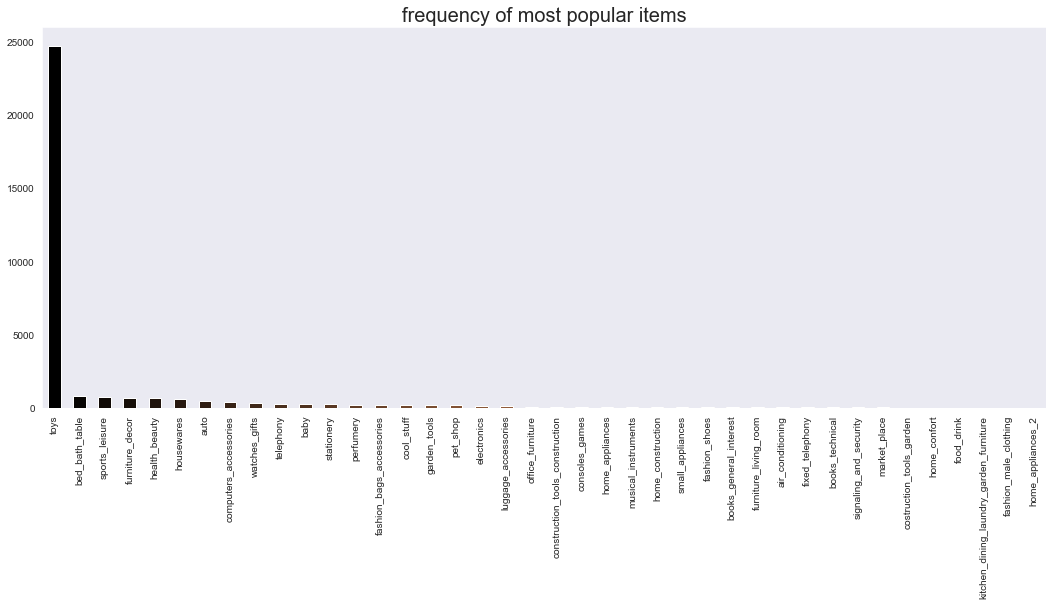

In [316]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[1].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [317]:
y = data[1].value_counts().head(50).to_frame()
y.index

Index(['toys', 'bed_bath_table', 'sports_leisure', 'furniture_decor',
       'health_beauty', 'housewares', 'auto', 'computers_accessories',
       'watches_gifts', 'telephony', 'baby', 'stationery', 'perfumery',
       'fashion_bags_accessories', 'cool_stuff', 'garden_tools', 'pet_shop',
       'electronics', 'luggage_accessories', 'office_furniture',
       'construction_tools_construction', 'consoles_games', 'home_appliances',
       'musical_instruments', 'home_construction', 'small_appliances',
       'fashion_shoes', 'books_general_interest', 'furniture_living_room',
       'air_conditioning', 'fixed_telephony', 'books_technical',
       'signaling_and_security', 'market_place', 'costruction_tools_garden',
       'home_confort', 'food_drink', 'kitchen_dining_laundry_garden_furniture',
       'fashion_male_clothing', 'home_appliances_2',
       'construction_tools_lights', 'agro_industry_and_commerce', 'drinks',
       'food', 'construction_tools_safety', 'christmas_supplies', 'au

In [318]:
# plotting a tree map
!pip install squarify
import squarify


# TREE MAP OF POPULAR ITEMS

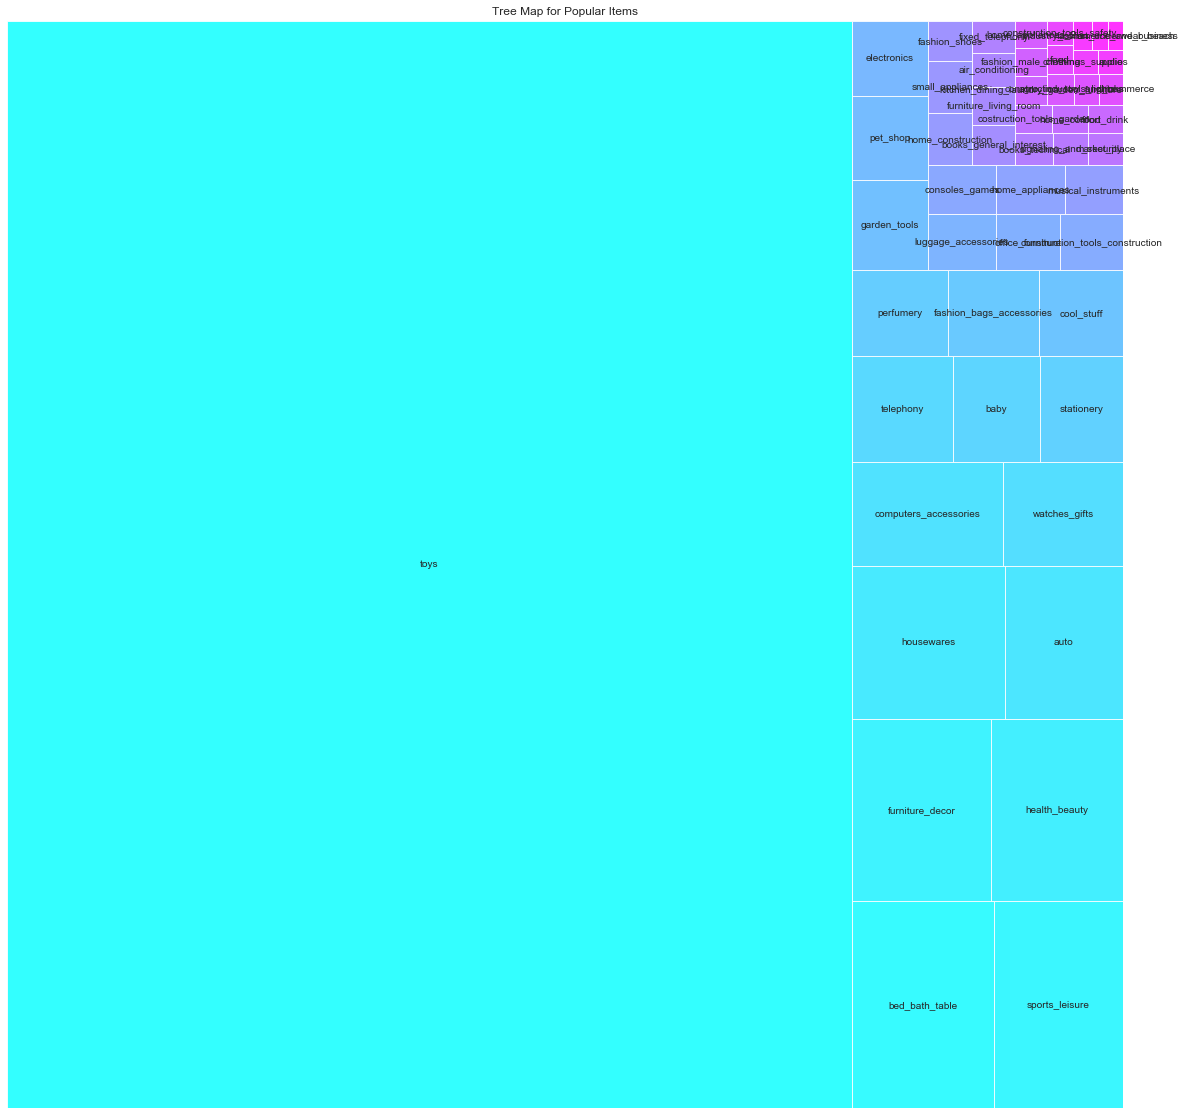

In [319]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [320]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# MOST POPULAR ITEMS BY WORDCLOUD

In [321]:
from wordcloud import WordCloud, STOPWORDS 

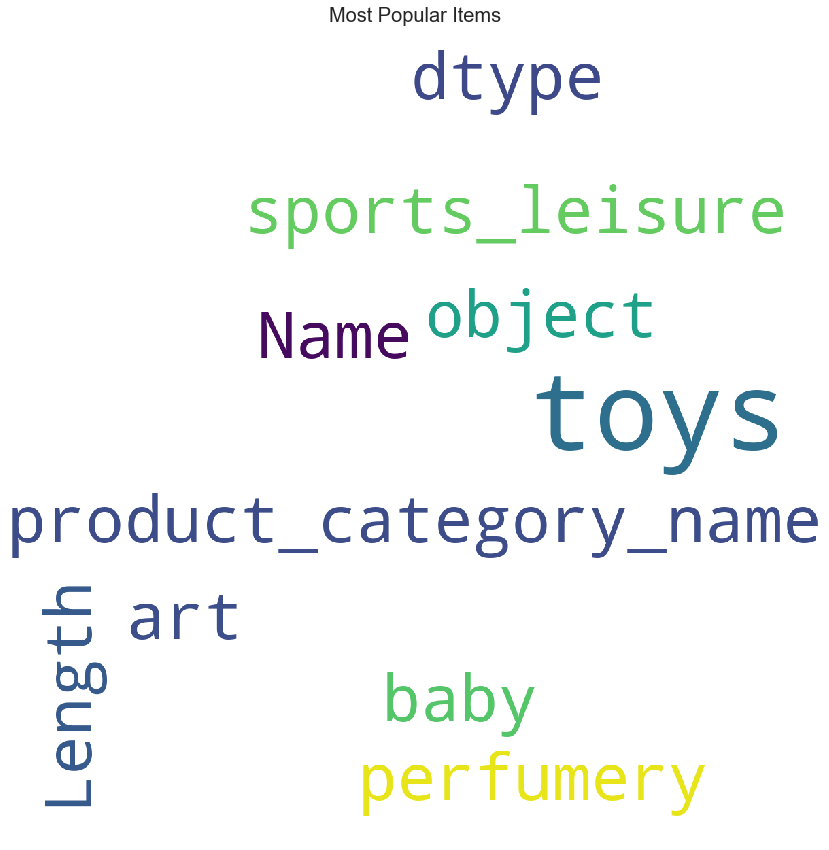

In [322]:

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[1]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [323]:
data[1].head()

0    product_category_name
1                perfumery
2                      art
3           sports_leisure
4                     baby
Name: 1, dtype: object

In [324]:
#imports
import pandas as pd #Python data analysis library
import numpy as np #Python scientific computing
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [325]:
productCountDf = retail_dataset.groupby("product_category_name",as_index = False)["order_id"].count()

In [326]:
productCountDf.sort_values('product_category_name', ascending=False)

,product_category_name,order_id
45,watches_gifts,1045
44,toys,45805
43,telephony,693
42,tablets_printing_image,82
41,stationery,177
40,sports_leisure,1068
39,small_appliances,50
38,signaling_and_security,13
37,pet_shop,182
36,perfumery,484


In [327]:
newproductCountDf=productCountDf.merge(retail_dataset, left_on='product_category_name', right_on='product_category_name', how='inner')
newDf = newproductCountDf[['product_category_name']]
newDf

,product_category_name
0,agro_industry_and_commerce
1,agro_industry_and_commerce
2,agro_industry_and_commerce
3,agro_industry_and_commerce
4,agro_industry_and_commerce
...,...
60988,watches_gifts
60989,watches_gifts
60990,watches_gifts
60991,watches_gifts


In [328]:
retail_dataset['reordered'] = 1

In [329]:

#Top 100 most frequently purchased products
topLev = 100
productCountDf = productCountDf.sort_values("order_id",ascending = False)
topProdFrame = productCountDf.iloc[0:topLev,:]
productcategory= topProdFrame.loc[:,["product_category_name"]]

In [330]:
basket = retail_dataset.groupby(['order_id', 'product_category_name'])['reordered'].sum().unstack().reset_index().fillna(0).set_index('order_id')

In [331]:
basket

product_category_name,agro_industry_and_commerce,air_conditioning,audio,auto,baby,bed_bath_table,books_technical,computers,computers_accessories,consoles_games,...,perfumery,pet_shop,signaling_and_security,small_appliances,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00061f2a7bc09da83e415a52dc8a4af1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0006ec9db01a64e59a68b2c340bf65a7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0008288aa423d2a3f00fcb17cd7d8719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff90cdcb3b2e6cfb397d05d562fd3fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fffb9224b6fc7c43ebb0904318b10b5f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
fffc94f6ce00a00581880bf54a75a037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [332]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [333]:
basket_sets = basket.applymap(encode_units)

In [334]:

basket_sets.head()

product_category_name,agro_industry_and_commerce,air_conditioning,audio,auto,baby,bed_bath_table,books_technical,computers,computers_accessories,consoles_games,...,perfumery,pet_shop,signaling_and_security,small_appliances,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00061f2a7bc09da83e415a52dc8a4af1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0006ec9db01a64e59a68b2c340bf65a7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0008288aa423d2a3f00fcb17cd7d8719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
basket_sets.size

2146452

In [336]:

# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [337]:

frequent_itemsets


,support,itemsets
0,0.024667,(bed_bath_table)
1,0.026338,(computers_accessories)
2,0.012516,(cool_stuff)
3,0.015430,(furniture_decor)
4,0.011701,(garden_tools)
5,0.038704,(health_beauty)
6,0.010394,(housewares)
7,0.018152,(sports_leisure)
8,0.011915,(telephony)
9,0.752518,(toys)


In [338]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

# MARKET BASKET ANALYSIS

In [339]:
dataset=[['toys', 'bed_bath_table', 'sports_leisure', 'furniture_decor',
       'health_beauty'], ['housewares', 'auto', 'computers_accessories',
       'watches_gifts', 'telephony'], ['baby', 'stationery', 'perfumery',
       'fashion_bags_accessories', 'cool_stuff'], ['garden_tools', 'pet_shop',
       'electronics', 'luggage_accessories', 'office_furniture'],
       ['construction_tools_construction', 'consoles_games', 'home_appliances',
       'musical_instruments', 'home_construction'], ['small_appliances',
       'fashion_shoes', 'books_general_interest', 'furniture_living_room',
       'air_conditioning'], ['fixed_telephony', 'books_technical',
       'signaling_and_security', 'market_place', 'costruction_tools_garden'],
       ['home_confort', 'food_drink', 'kitchen_dining_laundry_garden_furniture',
       'fashion_male_clothing', 'home_appliances_2'],
       ['construction_tools_lights', 'agro_industry_and_commerce', 'food',
       'drinks', 'construction_tools_safety', 'audio'], ['christmas_supplies',
       'art', 'industry_commerce_and_business', 'dvds_blu_ray']]



In [340]:
dataset1=['toys', 'bed_bath_table', 'sports_leisure', 'furniture_decor',
       'health_beauty', 'housewares', 'auto', 'computers_accessories',
       'watches_gifts', 'telephony', 'baby', 'stationery', 'perfumery',
       'fashion_bags_accessories', 'cool_stuff', 'garden_tools', 'pet_shop',
       'electronics', 'luggage_accessories', 'office_furniture',
       'construction_tools_construction', 'consoles_games', 'home_appliances',
       'musical_instruments', 'home_construction', 'small_appliances',
       'fashion_shoes', 'books_general_interest', 'furniture_living_room',
       'air_conditioning', 'fixed_telephony', 'books_technical',
       'signaling_and_security', 'market_place', 'costruction_tools_garden',
       'home_confort', 'food_drink', 'kitchen_dining_laundry_garden_furniture',
       'fashion_male_clothing', 'home_appliances_2',
       'construction_tools_lights', 'agro_industry_and_commerce', 'food',
       'drinks', 'construction_tools_safety', 'audio', 'christmas_supplies',
       'art', 'industry_commerce_and_business', 'dvds_blu_ray']